In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Importing the Datasets

### 5-year Government Yield (Bloomberg)

In [3]:
df_Govt_Yield_5Y = pd.read_excel("5Y/Government-Yields_Data_5Y.xlsx")

In [4]:
actual_colnames_Govt_Yield_5Y = {'C0825Y Index  (R4)':'USD',
                                 'C9105Y Index  (L2)':'EUR',
                                 'C1105Y Index  (R3)':'GBP',
                                 'C2565Y Index  (L1)':'CHF',
                                 'C1055Y Index  (R1)':'JPY',
                                 'C1275Y Index  (R1)':'AUD',
                                 'C1015Y Index  (R2)':'CAD',
                                 'C2505Y Index  (R1)':'NZD',
                                 'C2595Y Index  (L3)':'SEK',
                                 'C2665Y Index  (R1)':'NOK',
                                 'C2675Y Index  (L4)':'DKK'
                  }

df_Govt_Yield_5Y.rename(columns=actual_colnames_Govt_Yield_5Y, inplace=True)
df_Govt_Yield_5Y

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,SEK,DKK
0,2000-01-03,6.5000,5.0700,NaN,NaN,NaN,NaN,NaN,NaN,6.0400,5.5700,5.3900
1,2000-01-04,6.3900,5.0800,6.2300,3.0000,1.0700,6.9000,6.3700,NaN,6.0900,5.6100,5.3900
2,2000-01-05,6.4800,5.0900,6.2900,3.0000,1.0400,6.8400,6.4500,7.2200,6.0700,5.6200,5.3900
3,2000-01-06,6.4200,5.1100,6.3100,3.0300,1.0300,6.9300,6.3900,7.3100,6.1000,NaN,5.4300
4,2000-01-07,6.4200,4.9900,6.2600,3.0200,1.0800,6.9400,6.3800,7.3000,6.0800,5.5900,5.3600
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7413,0.4053,1.5347,0.3027,0.0196,2.7291,2.5159,3.1878,2.6398,1.1777,0.6607
5807,2022-04-06,2.7361,0.4178,1.5685,0.3503,0.0464,2.7999,2.4954,3.3563,2.7183,1.2658,0.6653
5808,2022-04-07,2.7243,0.4494,1.5644,0.3758,0.0353,2.7548,2.4949,3.3629,2.7266,1.2835,0.7090
5809,2022-04-08,2.7936,0.4821,1.5839,0.3982,0.0239,2.7741,2.5704,3.3851,2.7284,1.3332,0.7306


In [5]:
df_Govt_Yield_5Y = df_Govt_Yield_5Y.bfill(axis=0).ffill(axis=0)
df_Govt_Yield_5Y

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,SEK,DKK
0,2000-01-03,6.5000,5.0700,6.2300,3.0000,1.0700,6.9000,6.3700,7.2200,6.0400,5.5700,5.3900
1,2000-01-04,6.3900,5.0800,6.2300,3.0000,1.0700,6.9000,6.3700,7.2200,6.0900,5.6100,5.3900
2,2000-01-05,6.4800,5.0900,6.2900,3.0000,1.0400,6.8400,6.4500,7.2200,6.0700,5.6200,5.3900
3,2000-01-06,6.4200,5.1100,6.3100,3.0300,1.0300,6.9300,6.3900,7.3100,6.1000,5.5900,5.4300
4,2000-01-07,6.4200,4.9900,6.2600,3.0200,1.0800,6.9400,6.3800,7.3000,6.0800,5.5900,5.3600
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7413,0.4053,1.5347,0.3027,0.0196,2.7291,2.5159,3.1878,2.6398,1.1777,0.6607
5807,2022-04-06,2.7361,0.4178,1.5685,0.3503,0.0464,2.7999,2.4954,3.3563,2.7183,1.2658,0.6653
5808,2022-04-07,2.7243,0.4494,1.5644,0.3758,0.0353,2.7548,2.4949,3.3629,2.7266,1.2835,0.7090
5809,2022-04-08,2.7936,0.4821,1.5839,0.3982,0.0239,2.7741,2.5704,3.3851,2.7284,1.3332,0.7306


### Interest Rate Swaps (Bloomberg)

In [6]:
df_Int_Rate_Swap_5Y = pd.read_excel("5Y/IRS_Data_5Y.xlsx")

In [7]:
actual_colnames_Int_Rate_Swap_5Y = {'USSW5 Curncy  (R1)':'IRS_USD',
                                    'EUSW5V3 Curncy  (L3)':'IRS_EUR_V3',
                                    'EUSA5 Curncy  (R1)':'IRS_EUR',
                                    'BPSW5V3 Curncy  (R3)':'IRS_GBP_V3',
                                    'BPSW5 Curncy  (L2)':'IRS_GBP',
                                    'SFSW5V3 Curncy  (L1)':'IRS_CHF_V3',
                                    'SFSW5 Curncy  (R2)':'IRS_CHF',
                                    'JYSW5 Curncy  (R1)':'IRS_JPY',
                                    'JYBC5 Curncy  (R1)':'IRS_JPY_BC',
                                    'ADSWAP5 Curncy  (R1)':'IRS_AUD',
                                    'CDSW5 Curncy  (R4)':'IRS_CAD',
                                    'NDSWAP5 Curncy  (R1)':'IRS_NZD',
                                    'NKSW5 Curncy  (R1)':'IRS_NOK',
                                    'NKBFVC5 Curncy  (R1)':'IRS_NOK_BFVC',
                                    'SKSW5 Curncy  (L4)':'IRS_SEK',
                                    'DKSW5 Curncy  (R1)':'IRS_DKK'
                                   }

df_Int_Rate_Swap_5Y.rename(columns=actual_colnames_Int_Rate_Swap_5Y, inplace=True)
df_Int_Rate_Swap_5Y

,Date,IRS_USD,IRS_EUR_V3,IRS_EUR,IRS_GBP_V3,IRS_GBP,IRS_CHF_V3,IRS_CHF,IRS_JPY,IRS_JPY_BC,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_NOK_BFVC,IRS_SEK,IRS_DKK
0,2000-01-03,7.1700,NaN,5.285,NaN,NaN,NaN,NaN,1.2400,NaN,7.2375,6.5200,NaN,6.5260,NaN,6.0700,5.7300
1,2000-01-04,7.0900,NaN,5.305,NaN,NaN,NaN,NaN,1.3200,NaN,7.3500,6.5800,7.9450,6.6350,NaN,6.1250,5.7300
2,2000-01-05,7.1600,NaN,5.275,NaN,NaN,NaN,NaN,1.2800,NaN,7.2600,6.6300,8.0000,6.6500,NaN,6.1300,5.7200
3,2000-01-06,7.1100,NaN,5.335,NaN,NaN,NaN,NaN,1.2700,NaN,7.3400,6.5600,7.9750,6.5170,NaN,6.1750,5.7500
4,2000-01-07,7.0800,NaN,5.285,NaN,NaN,NaN,NaN,1.3265,NaN,7.3550,6.5500,8.0200,6.5219,NaN,6.1100,5.6850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7399,1.029,NaN,NaN,NaN,NaN,NaN,0.1831,NaN,3.0650,2.9386,3.5987,2.8824,8.3,1.8450,1.3610
5807,2022-04-06,2.7315,1.029,NaN,NaN,NaN,NaN,NaN,0.2052,NaN,3.0700,2.9061,3.6500,2.9472,8.3,1.9082,1.3620
5808,2022-04-07,2.7574,1.062,NaN,NaN,NaN,NaN,NaN,0.2001,NaN,3.0950,2.9246,3.6712,2.9375,8.3,1.9420,1.3905
5809,2022-04-08,2.8180,1.143,NaN,NaN,NaN,NaN,NaN,0.2051,NaN,3.0969,2.9790,3.6925,2.9370,8.3,1.9800,1.4420


In [8]:
df_Int_Rate_Swap_5Y['IRS_EUR'] = df_Int_Rate_Swap_5Y[['IRS_EUR_V3','IRS_EUR']].mean(axis=1)
df_Int_Rate_Swap_5Y['IRS_GBP'] = df_Int_Rate_Swap_5Y[['IRS_GBP_V3','IRS_GBP']].mean(axis=1)
df_Int_Rate_Swap_5Y['IRS_CHF'] = df_Int_Rate_Swap_5Y[['IRS_CHF_V3','IRS_CHF']].mean(axis=1)
# df_Int_Rate_Swap_5Y['IRS_JPY'] = df_Int_Rate_Swap_5Y[['IRS_JPY_BC','IRS_JPY']].mean(axis=1)
# df_Int_Rate_Swap_5Y['IRS_NOK'] = df_Int_Rate_Swap_5Y[['IRS_NOK_BFVC','IRS_NOK']].mean(axis=1)

df_Int_Rate_Swap_5Y.drop(['IRS_EUR_V3','IRS_GBP_V3','IRS_CHF_V3','IRS_JPY_BC','IRS_NOK_BFVC'], axis=1, inplace=True)
df_Int_Rate_Swap_5Y

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_SEK,IRS_DKK
0,2000-01-03,7.1700,5.285,NaN,NaN,1.2400,7.2375,6.5200,NaN,6.5260,6.0700,5.7300
1,2000-01-04,7.0900,5.305,NaN,NaN,1.3200,7.3500,6.5800,7.9450,6.6350,6.1250,5.7300
2,2000-01-05,7.1600,5.275,NaN,NaN,1.2800,7.2600,6.6300,8.0000,6.6500,6.1300,5.7200
3,2000-01-06,7.1100,5.335,NaN,NaN,1.2700,7.3400,6.5600,7.9750,6.5170,6.1750,5.7500
4,2000-01-07,7.0800,5.285,NaN,NaN,1.3265,7.3550,6.5500,8.0200,6.5219,6.1100,5.6850
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7399,1.029,NaN,NaN,0.1831,3.0650,2.9386,3.5987,2.8824,1.8450,1.3610
5807,2022-04-06,2.7315,1.029,NaN,NaN,0.2052,3.0700,2.9061,3.6500,2.9472,1.9082,1.3620
5808,2022-04-07,2.7574,1.062,NaN,NaN,0.2001,3.0950,2.9246,3.6712,2.9375,1.9420,1.3905
5809,2022-04-08,2.8180,1.143,NaN,NaN,0.2051,3.0969,2.9790,3.6925,2.9370,1.9800,1.4420


In [9]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_Int_Rate_Swap_5Y = df_Int_Rate_Swap_5Y.bfill(axis='rows').ffill(axis='rows')
df_Int_Rate_Swap_5Y

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_SEK,IRS_DKK
0,2000-01-03,7.1700,5.285,3.237300,1.6695,1.2400,7.2375,6.5200,7.9450,6.5260,6.0700,5.7300
1,2000-01-04,7.0900,5.305,3.237300,1.6695,1.3200,7.3500,6.5800,7.9450,6.6350,6.1250,5.7300
2,2000-01-05,7.1600,5.275,3.237300,1.6695,1.2800,7.2600,6.6300,8.0000,6.6500,6.1300,5.7200
3,2000-01-06,7.1100,5.335,3.237300,1.6695,1.2700,7.3400,6.5600,7.9750,6.5170,6.1750,5.7500
4,2000-01-07,7.0800,5.285,3.237300,1.6695,1.3265,7.3550,6.5500,8.0200,6.5219,6.1100,5.6850
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7399,1.029,1.223875,-0.1600,0.1831,3.0650,2.9386,3.5987,2.8824,1.8450,1.3610
5807,2022-04-06,2.7315,1.029,1.223875,-0.1600,0.2052,3.0700,2.9061,3.6500,2.9472,1.9082,1.3620
5808,2022-04-07,2.7574,1.062,1.223875,-0.1600,0.2001,3.0950,2.9246,3.6712,2.9375,1.9420,1.3905
5809,2022-04-08,2.8180,1.143,1.223875,-0.1600,0.2051,3.0969,2.9790,3.6925,2.9370,1.9800,1.4420


### Basis Swaps (Bloomberg)

In [10]:
df_Basis_Swaps_5Y = pd.read_excel("5Y/Basis-Swaps_Data_5Y.xlsx")

In [11]:
actual_colnames_Basis_Swaps_5Y = {'EUBS5 Curncy  (R4)':'BS_EUR',
                                  'BPBS5 Curncy  (R1)':'BS_GBP',
                                  'SFBS5 Curncy  (L2)':'BS_CHF',
                                  'JYBS5 Curncy  (R1)':'BS_JPY',
                                  'ADBS5 Curncy  (R1)':'BS_AUD',
                                  'CDBS5 Curncy  (L4)':'BS_CAD',
                                  'NDBS5 Curncy  (R2)':'BS_NZD',
                                  'NKBS5 Curncy  (L1)':'BS_NOK',
                                  'SKBS5 Curncy  (R3)':'BS_SEK',
                                  'DKBS5 Curncy  (L3)':'BS_DKK'
                                 }

df_Basis_Swaps_5Y.rename(columns=actual_colnames_Basis_Swaps_5Y, inplace=True)
df_Basis_Swaps_5Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,NaN,NaN,NaN,NaN,6.500,NaN,4.000,NaN,NaN,NaN
3,2000-01-06,NaN,NaN,NaN,NaN,6.500,NaN,NaN,-3.50,NaN,NaN
4,2000-01-07,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5798,2022-04-05,NaN,NaN,NaN,NaN,33.250,-6.750,29.250,-3.00,-2.5,NaN
5799,2022-04-06,NaN,NaN,NaN,NaN,33.875,-6.790,30.250,-3.25,-3.0,NaN
5800,2022-04-07,NaN,NaN,NaN,NaN,33.875,-7.250,30.500,-3.25,-3.5,NaN
5801,2022-04-08,NaN,NaN,NaN,NaN,33.875,-7.433,30.250,-3.25,-4.0,NaN


In [12]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_Basis_Swaps_5Y = df_Basis_Swaps_5Y.bfill(axis='rows').ffill(axis='rows')
df_Basis_Swaps_5Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,-14.5095,5.5196,-24.0445,-42.500,6.500,8.000,4.000,-3.50,-4.25,-29.5
1,2000-01-04,-14.5095,5.5196,-24.0445,-42.500,6.500,8.000,4.000,-3.50,-4.25,-29.5
2,2000-01-05,-14.5095,5.5196,-24.0445,-42.500,6.500,8.000,4.000,-3.50,-4.25,-29.5
3,2000-01-06,-14.5095,5.5196,-24.0445,-42.500,6.500,8.000,4.000,-3.50,-4.25,-29.5
4,2000-01-07,-14.5095,5.5196,-24.0445,-42.500,6.500,8.000,4.000,-2.00,-4.25,-29.5
...,...,...,...,...,...,...,...,...,...,...,...
5798,2022-04-05,-8.1250,-2.3750,-7.2500,-26.875,33.250,-6.750,29.250,-3.00,-2.50,-37.0
5799,2022-04-06,-8.1250,-2.3750,-7.2500,-26.875,33.875,-6.790,30.250,-3.25,-3.00,-37.0
5800,2022-04-07,-8.1250,-2.3750,-7.2500,-26.875,33.875,-7.250,30.500,-3.25,-3.50,-37.0
5801,2022-04-08,-8.1250,-2.3750,-7.2500,-26.875,33.875,-7.433,30.250,-3.25,-4.00,-37.0


In [13]:
#Converting the Basis Swap value into percentage terms from basis terms by dividing it by 100

df_Basis_Swaps_5Y = (df_Basis_Swaps_5Y.set_index('Date')/100).reset_index()
df_Basis_Swaps_5Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
1,2000-01-04,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
2,2000-01-05,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
3,2000-01-06,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
4,2000-01-07,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0200,-0.0425,-0.295
...,...,...,...,...,...,...,...,...,...,...,...
5798,2022-04-05,-0.081250,-0.023750,-0.072500,-0.26875,0.33250,-0.06750,0.29250,-0.0300,-0.0250,-0.370
5799,2022-04-06,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.06790,0.30250,-0.0325,-0.0300,-0.370
5800,2022-04-07,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07250,0.30500,-0.0325,-0.0350,-0.370
5801,2022-04-08,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07433,0.30250,-0.0325,-0.0400,-0.370


### CDS (IHS Markit)

- Only USD & EUR is available

In [14]:
df_CDS = pd.read_csv('data/Markit_CDS.csv')
df_CDS

,redcode,date,tier,ccy,ticker,shortname,docclause,contributor,sector,region,...,compositelevel7y,compositelevel10y,compositelevel15y,compositelevel20y,compositelevel30y,compositedepth5y,compositecurverating,compositelevelrecovery,recovery,impliedrating
0,9A3AAA,20031127.0,SNRFOR,USD,USGB,Utd Sts Amer,MR,Composite,Government,N.Amer,...,NaN,NaN,NaN,NaN,NaN,3.0,NR,NaN,NaN,AAA
1,9A3AAA,20031128.0,SNRFOR,USD,USGB,Utd Sts Amer,MR,Composite,Government,N.Amer,...,NaN,NaN,NaN,NaN,NaN,3.0,NR,NaN,NaN,AAA
2,9A3AAA,20031201.0,SNRFOR,EUR,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,Thin,NaN,NaN,NaN,NaN,4.0,NR,NaN,NaN,AAA
3,9A3AAA,20031201.0,SNRFOR,USD,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,Thin,NaN,NaN,NaN,NaN,4.0,NR,NaN,NaN,AAA
4,9A3AAA,20031201.0,SNRFOR,USD,USGB,Utd Sts Amer,MM,Composite,Government,N.Amer,...,Thin,NaN,NaN,NaN,NaN,4.0,NR,NaN,NaN,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24395,9A3AAA,20201127.0,SNRFOR,USD,USGB,Utd Sts Amer,CR14,Composite,Government,N.Amer,...,CcyGrp,CcyGrp,CcyGrp,CcyGrp,CcyGrp,4.0,BBB,CcyGrp,0.4,AAA
24396,9A3AAA,20201130.0,SNRFOR,EUR,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,CcyGrp,Thin,Thin,Thin,Thin,3.0,A,CcyGrp,0.4,AAA
24397,9A3AAA,20201130.0,SNRFOR,EUR,USGB,Utd Sts Amer,CR14,Composite,Government,N.Amer,...,CcyGrp,Thin,Thin,Thin,Thin,3.0,A,CcyGrp,0.4,AAA
24398,9A3AAA,20201130.0,SNRFOR,USD,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,CcyGrp,Thin,Thin,Thin,Thin,3.0,A,CcyGrp,0.4,AAA


In [15]:
df_CDS = df_CDS.loc[df_CDS['ccy']=='EUR', ['date', 'spread5y']].rename(columns={'date':'Date', 'spread5y':'EUR'})

df_CDS['Date'] = pd.to_datetime(df_CDS['Date'], format='%Y%m%d') 
df_CDS

,Date,EUR
2,2003-12-01,0.000157
6,2003-12-02,0.000157
10,2003-12-03,0.000157
14,2003-12-04,0.000157
18,2003-12-05,0.000157
...,...,...
24389,2020-11-26,0.001392
24392,2020-11-27,0.001084
24393,2020-11-27,0.001376
24396,2020-11-30,0.001065


### Nominal Yield
- the currency-specific nominal yields of our 10 countries sample at the five-year horizon

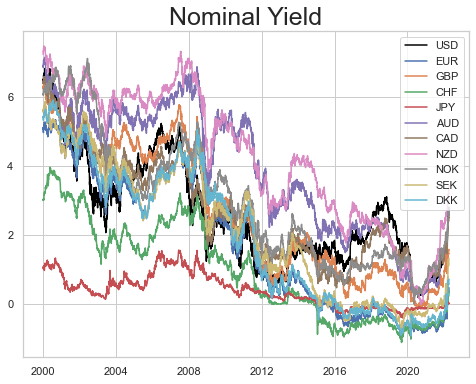

In [17]:
#Plotting Nominal Yields (Fig-1a)

plt.figure(figsize=(8,6))

for each_curr in df_Govt_Yield_5Y.iloc[:,1:]:
    if each_curr == 'USD':
        plt.plot(df_Govt_Yield_5Y['Date'], df_Govt_Yield_5Y[each_curr], label=each_curr, color='black')
    else:
        plt.plot(df_Govt_Yield_5Y['Date'], df_Govt_Yield_5Y[each_curr], label=each_curr)

plt.title("Nominal Yield", fontsize=25)
plt.legend()
plt.savefig("Output/Fig_1A_Nominal-Yield.jpg")
plt.show()

# Computations & Analysis

### Market-implied Forward Premium (MiFP)
- For longer term maturity(>=1), we calculate as follows:

MiFP(i,n,t) = IRS(i,n,t) + BS(i,n,t) − IRS(USD,n,t)

In [18]:
# First merge the IRS and BS data based on Date

df_MiFP = df_Int_Rate_Swap_5Y.merge(df_Basis_Swaps_5Y, left_on='Date', right_on='Date', how='outer')

In [19]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_MiFP = df_MiFP.bfill(axis='rows').ffill(axis='rows')
df_MiFP

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,...,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,7.1700,5.285,3.237300,1.6695,1.2400,7.2375,6.5200,7.9450,6.5260,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
1,2000-01-04,7.0900,5.305,3.237300,1.6695,1.3200,7.3500,6.5800,7.9450,6.6350,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
2,2000-01-05,7.1600,5.275,3.237300,1.6695,1.2800,7.2600,6.6300,8.0000,6.6500,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
3,2000-01-06,7.1100,5.335,3.237300,1.6695,1.2700,7.3400,6.5600,7.9750,6.5170,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
4,2000-01-07,7.0800,5.285,3.237300,1.6695,1.3265,7.3550,6.5500,8.0200,6.5219,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0200,-0.0425,-0.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7399,1.029,1.223875,-0.1600,0.1831,3.0650,2.9386,3.5987,2.8824,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33250,-0.06750,0.29250,-0.0300,-0.0250,-0.370
5807,2022-04-06,2.7315,1.029,1.223875,-0.1600,0.2052,3.0700,2.9061,3.6500,2.9472,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.06790,0.30250,-0.0325,-0.0300,-0.370
5808,2022-04-07,2.7574,1.062,1.223875,-0.1600,0.2001,3.0950,2.9246,3.6712,2.9375,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07250,0.30500,-0.0325,-0.0350,-0.370
5809,2022-04-08,2.8180,1.143,1.223875,-0.1600,0.2051,3.0969,2.9790,3.6925,2.9370,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07433,0.30250,-0.0325,-0.0400,-0.370


In [20]:
# Now calculate MiFP based on the above formula

df_MiFP['MiFP_EUR'] = df_MiFP['IRS_EUR'] + df_MiFP['BS_EUR'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_GBP'] = df_MiFP['IRS_GBP'] + df_MiFP['BS_GBP'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_CHF'] = df_MiFP['IRS_CHF'] + df_MiFP['BS_CHF'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_JPY'] = df_MiFP['IRS_JPY'] + df_MiFP['BS_JPY'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_AUD'] = df_MiFP['IRS_AUD'] + df_MiFP['BS_AUD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_CAD'] = df_MiFP['IRS_CAD'] + df_MiFP['BS_CAD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_NZD'] = df_MiFP['IRS_NZD'] + df_MiFP['BS_NZD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_NOK'] = df_MiFP['IRS_NOK'] + df_MiFP['BS_NOK'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_DKK'] = df_MiFP['IRS_DKK'] + df_MiFP['BS_DKK'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_SEK'] = df_MiFP['IRS_SEK'] + df_MiFP['BS_SEK'] - df_MiFP['IRS_USD']

# Keeping the relevant columns

df_MiFP = df_MiFP[['Date','MiFP_EUR', 'MiFP_GBP', 'MiFP_CHF',
                   'MiFP_JPY', 'MiFP_AUD', 'MiFP_CAD',
                   'MiFP_NZD', 'MiFP_NOK', 'MiFP_DKK', 'MiFP_SEK'
                  ]]
df_MiFP

,Date,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,-2.030095,-3.877504,-5.740945,-6.35500,0.13250,-0.57000,0.81500,-0.6790,-1.7350,-1.1425
1,2000-01-04,-1.930095,-3.797504,-5.660945,-6.19500,0.32500,-0.43000,0.89500,-0.4900,-1.6550,-1.0075
2,2000-01-05,-2.030095,-3.867504,-5.730945,-6.30500,0.16500,-0.45000,0.88000,-0.5450,-1.7350,-1.0725
3,2000-01-06,-1.920095,-3.817504,-5.680945,-6.26500,0.29500,-0.47000,0.90500,-0.6280,-1.6550,-0.9775
4,2000-01-07,-1.940095,-3.787504,-5.650945,-6.17850,0.34000,-0.45000,0.98000,-0.5781,-1.6900,-1.0125
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,-1.792150,-1.539775,-2.972400,-2.82555,0.65760,0.13120,1.15130,0.1125,-1.7489,-0.9199
5807,2022-04-06,-1.783750,-1.531375,-2.964000,-2.79505,0.67725,0.10670,1.22100,0.1832,-1.7395,-0.8533
5808,2022-04-07,-1.776650,-1.557275,-2.989900,-2.82605,0.67635,0.09470,1.21880,0.1476,-1.7369,-0.8504
5809,2022-04-08,-1.756250,-1.617875,-3.050500,-2.88165,0.61765,0.08667,1.17700,0.0865,-1.7460,-0.8780


### Swap-implied Dollar Yield (SiDY)
- Intuitively, since GovtYield(i,n,t) − MiFP(i,n,t) measures the synthetic dollar borrowing cost of swapping the cash flows of foreign currency Treasury bonds into U.S. dollars.
- At 5-year tenor, it can calculated as:

    SiDY(i,n,t=5) = GovtYield(i,n,t=5) − MiFP(i,n,t=5)


- It is immediately clear that these swap-implied dollar yields track the yield on U.S. Treasuries very closely, with significantly less dispersion than currency-specific yields.

In [21]:
# First merge the Government Yield and MiFP data based on Date

df_SiDY = df_Govt_Yield_5Y.merge(df_MiFP, left_on='Date', right_on='Date', how='outer')

In [22]:
# Now calculate SiDY based on the above formula

df_SiDY['SiDY_EUR'] = df_SiDY['EUR'] - df_SiDY['MiFP_EUR']
df_SiDY['SiDY_GBP'] = df_SiDY['GBP'] - df_SiDY['MiFP_GBP']
df_SiDY['SiDY_CHF'] = df_SiDY['CHF'] - df_SiDY['MiFP_CHF']
df_SiDY['SiDY_JPY'] = df_SiDY['JPY'] - df_SiDY['MiFP_JPY']
df_SiDY['SiDY_AUD'] = df_SiDY['AUD'] - df_SiDY['MiFP_AUD']
df_SiDY['SiDY_CAD'] = df_SiDY['CAD'] - df_SiDY['MiFP_CAD']
df_SiDY['SiDY_NZD'] = df_SiDY['NZD'] - df_SiDY['MiFP_NZD']
df_SiDY['SiDY_NOK'] = df_SiDY['NOK'] - df_SiDY['MiFP_NOK']
df_SiDY['SiDY_DKK'] = df_SiDY['DKK'] - df_SiDY['MiFP_DKK']
df_SiDY['SiDY_SEK'] = df_SiDY['SEK'] - df_SiDY['MiFP_SEK']

# Keeping the relevant columns

df_SiDY = df_SiDY[['Date','USD', 'SiDY_EUR', 'SiDY_GBP', 'SiDY_CHF',
                   'SiDY_JPY', 'SiDY_AUD', 'SiDY_CAD',
                   'SiDY_NZD', 'SiDY_NOK', 'SiDY_DKK', 'SiDY_SEK'
                  ]]
df_SiDY.dropna(axis='rows',inplace=True)
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-03,6.5000,7.100095,10.107504,8.740945,7.42500,6.76750,6.94000,6.40500,6.7190,7.1250,6.7125
1,2000-01-04,6.3900,7.010095,10.027504,8.660945,7.26500,6.57500,6.80000,6.32500,6.5800,7.0450,6.6175
2,2000-01-05,6.4800,7.120095,10.157504,8.730945,7.34500,6.67500,6.90000,6.34000,6.6150,7.1250,6.6925
3,2000-01-06,6.4200,7.030095,10.127504,8.710945,7.29500,6.63500,6.86000,6.40500,6.7280,7.0850,6.5675
4,2000-01-07,6.4200,6.930095,10.047504,8.670945,7.25850,6.60000,6.83000,6.32000,6.6581,7.0500,6.6025
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7413,2.197450,3.074475,3.275100,2.84515,2.07150,2.38470,2.03650,2.5273,2.4096,2.0976
5807,2022-04-06,2.7361,2.201550,3.099875,3.314300,2.84145,2.12265,2.38870,2.13530,2.5351,2.4048,2.1191
5808,2022-04-07,2.7243,2.226050,3.121675,3.365700,2.86135,2.07845,2.40020,2.14410,2.5790,2.4459,2.1339
5809,2022-04-08,2.7936,2.238350,3.201775,3.448700,2.90555,2.15645,2.48373,2.20810,2.6419,2.4766,2.2112


In [23]:
# Taking seven-day moving averages

df_SiDY = df_SiDY.set_index('Date').dropna().rolling(7).mean().dropna().reset_index()
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-11,6.462857,7.062952,10.100361,8.723802,7.327643,6.659643,6.882857,6.376429,6.689800,7.111429,6.658929
1,2000-01-12,6.477143,7.071881,10.126075,8.743802,7.328357,6.661071,6.897143,6.390714,6.690657,7.131429,6.673214
2,2000-01-13,6.508571,7.082238,10.143933,8.764516,7.344557,6.680714,6.929286,6.412143,6.713400,7.150714,6.690357
3,2000-01-14,6.522857,7.084024,10.149647,8.775945,7.353129,6.691429,6.944286,6.430714,6.724829,7.165000,6.704643
4,2000-01-17,6.554286,7.105095,10.168218,8.795945,7.370986,6.707857,6.965714,6.459286,6.732943,7.183571,6.739643
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,2.571343,2.094821,2.874004,3.121471,2.711836,1.951264,2.242786,1.997414,2.354207,2.289143,1.973557
5801,2022-04-06,2.592371,2.103336,2.904289,3.150000,2.725464,1.967779,2.258914,2.006386,2.378193,2.298143,1.989029
5802,2022-04-07,2.620414,2.125364,2.943689,3.184171,2.751750,1.987293,2.285071,2.025671,2.415264,2.323714,2.018786
5803,2022-04-08,2.665629,2.158021,3.003218,3.232729,2.793007,2.030429,2.330119,2.066743,2.471929,2.361600,2.063814


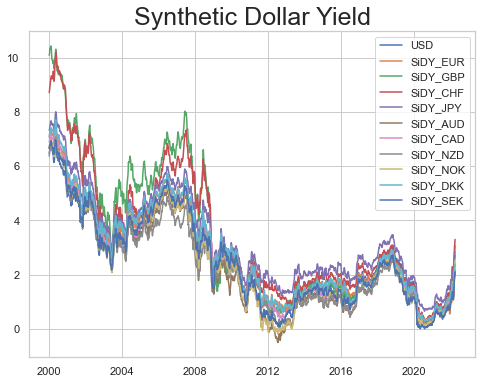

In [24]:
#Plotting Synthetic Dollar Yields (Fig-1b)

plt.figure(figsize=(8,6))

for each_curr in df_SiDY.iloc[:,1:]:
    plt.plot(df_SiDY['Date'], df_SiDY[each_curr], label=each_curr)

plt.title("Synthetic Dollar Yield", fontsize=25)
plt.legend()
plt.savefig("Output/Fig_1B_Synthetic-Dollar-Yield.jpg")
plt.show()

### Average US Treasury Premium

- U.S. Treasury Premium, **Avg_US_Treasury_Prem(i,n,t)**, measures the difference in borrowing costs between foreign governments and the U.S. Treasury.
- Assumptions:
    - Government Bonds are default-free
    - FX swap markets are frictionless
    - Synthetic dollar yields of foreign Treasuries can be higher than the US Treasury yield if and only if the convienance yield of the US Treasury bond is higher than that of the foreign government bond

In [25]:
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-11,6.462857,7.062952,10.100361,8.723802,7.327643,6.659643,6.882857,6.376429,6.689800,7.111429,6.658929
1,2000-01-12,6.477143,7.071881,10.126075,8.743802,7.328357,6.661071,6.897143,6.390714,6.690657,7.131429,6.673214
2,2000-01-13,6.508571,7.082238,10.143933,8.764516,7.344557,6.680714,6.929286,6.412143,6.713400,7.150714,6.690357
3,2000-01-14,6.522857,7.084024,10.149647,8.775945,7.353129,6.691429,6.944286,6.430714,6.724829,7.165000,6.704643
4,2000-01-17,6.554286,7.105095,10.168218,8.795945,7.370986,6.707857,6.965714,6.459286,6.732943,7.183571,6.739643
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,2.571343,2.094821,2.874004,3.121471,2.711836,1.951264,2.242786,1.997414,2.354207,2.289143,1.973557
5801,2022-04-06,2.592371,2.103336,2.904289,3.150000,2.725464,1.967779,2.258914,2.006386,2.378193,2.298143,1.989029
5802,2022-04-07,2.620414,2.125364,2.943689,3.184171,2.751750,1.987293,2.285071,2.025671,2.415264,2.323714,2.018786
5803,2022-04-08,2.665629,2.158021,3.003218,3.232729,2.793007,2.030429,2.330119,2.066743,2.471929,2.361600,2.063814


In [26]:
Avg_US_Treasury_Prem = df_SiDY.copy()

Avg_US_Treasury_Prem['AUD'] = Avg_US_Treasury_Prem['SiDY_AUD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['CAD'] = Avg_US_Treasury_Prem['SiDY_CAD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['CHF'] = Avg_US_Treasury_Prem['SiDY_CHF'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['DKK'] = Avg_US_Treasury_Prem['SiDY_DKK'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['EUR'] = Avg_US_Treasury_Prem['SiDY_EUR'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['GBP'] = Avg_US_Treasury_Prem['SiDY_GBP'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['JPY'] = Avg_US_Treasury_Prem['SiDY_JPY'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['NOK'] = Avg_US_Treasury_Prem['SiDY_NOK'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['NZD'] = Avg_US_Treasury_Prem['SiDY_NZD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['SEK'] = Avg_US_Treasury_Prem['SiDY_SEK'] - Avg_US_Treasury_Prem['USD']

#Keep the relevant columns

Avg_US_Treasury_Prem = Avg_US_Treasury_Prem[['Date', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK']]
Avg_US_Treasury_Prem

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,0.196071
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,0.196071
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,0.181786
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,0.181786
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,0.185357
...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,-0.620079,-0.328557,0.550129,-0.282200,-0.476521,0.302661,0.140493,-0.217136,-0.573929,-0.597786
5801,2022-04-06,-0.624593,-0.333457,0.557629,-0.294229,-0.489036,0.311918,0.133093,-0.214179,-0.585986,-0.603343
5802,2022-04-07,-0.633121,-0.335343,0.563757,-0.296700,-0.495050,0.323275,0.131336,-0.205150,-0.594743,-0.601629
5803,2022-04-08,-0.635200,-0.335510,0.567100,-0.304029,-0.507607,0.337589,0.127379,-0.193700,-0.598886,-0.601814


In [27]:
Avg_US_Treasury_Prem['Mean_5Y_US_Treasury_Prem'] = Avg_US_Treasury_Prem.set_index('Date').mean(axis=1).reset_index()[0]
Avg_US_Treasury_Prem

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK,Mean_5Y_US_Treasury_Prem
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,0.196071,0.896527
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,0.196071,0.894292
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,0.181786,0.882614
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,0.181786,0.879507
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,0.185357,0.868640
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,-0.620079,-0.328557,0.550129,-0.282200,-0.476521,0.302661,0.140493,-0.217136,-0.573929,-0.597786,-0.210292
5801,2022-04-06,-0.624593,-0.333457,0.557629,-0.294229,-0.489036,0.311918,0.133093,-0.214179,-0.585986,-0.603343,-0.214218
5802,2022-04-07,-0.633121,-0.335343,0.563757,-0.296700,-0.495050,0.323275,0.131336,-0.205150,-0.594743,-0.601629,-0.214337
5803,2022-04-08,-0.635200,-0.335510,0.567100,-0.304029,-0.507607,0.337589,0.127379,-0.193700,-0.598886,-0.601814,-0.214468


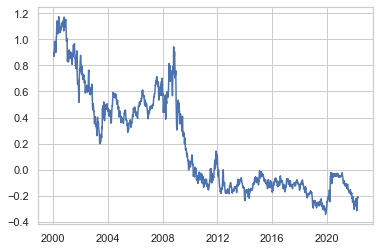

In [28]:
plt.plot(Avg_US_Treasury_Prem['Date'], Avg_US_Treasury_Prem['Mean_5Y_US_Treasury_Prem'])

#### Computations for two adjusted versions of the U.S. Treasury Premium:
1. Premium adjusted for Swap market frictions
    - (a.k.a.) Premium, adj. LIBOR CIP dev.
    - Tau_Libor(i,n,t) = { IRS(i,n,t) - IRS(USD,n,t) } - MiFP(i,n,t)
    - In benchmark calculation, we use the Libor interest rate swap as our risk-free rate proxy.
2. Premium adjusted for both Swap market frictions and the credit differential between foreign and US Treasuries
    - (a.k.a.) Premium, adj. LIBOR CIP dev & CDS

##### 1. Premium, adj. LIBOR CIP dev.

   _**Equation-1:**_ Tau_Libor(i,n,t) = { IRS(i,n,t) - IRS(USD,n,t) } - MiFP(i,n,t)

   _**Equation-2:**_ Adjusted_Swap_Avg_US_Treasury_Prem(i,n,t) = Avg_US_Treasury_Prem(i,n,t) - Tau_Libor(i,n,t)

In [29]:
# First merge the IRS and MiFP datasets

df_Adjusted_Swap_Avg_US_Treasury_Prem = df_Int_Rate_Swap_5Y.merge(df_MiFP, left_on='Date', right_on='Date', how='outer')
df_Adjusted_Swap_Avg_US_Treasury_Prem

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,...,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,7.1700,5.285,3.237300,1.6695,1.2400,7.2375,6.5200,7.9450,6.5260,...,-2.030095,-3.877504,-5.740945,-6.35500,0.13250,-0.57000,0.81500,-0.6790,-1.7350,-1.1425
1,2000-01-04,7.0900,5.305,3.237300,1.6695,1.3200,7.3500,6.5800,7.9450,6.6350,...,-1.930095,-3.797504,-5.660945,-6.19500,0.32500,-0.43000,0.89500,-0.4900,-1.6550,-1.0075
2,2000-01-05,7.1600,5.275,3.237300,1.6695,1.2800,7.2600,6.6300,8.0000,6.6500,...,-2.030095,-3.867504,-5.730945,-6.30500,0.16500,-0.45000,0.88000,-0.5450,-1.7350,-1.0725
3,2000-01-06,7.1100,5.335,3.237300,1.6695,1.2700,7.3400,6.5600,7.9750,6.5170,...,-1.920095,-3.817504,-5.680945,-6.26500,0.29500,-0.47000,0.90500,-0.6280,-1.6550,-0.9775
4,2000-01-07,7.0800,5.285,3.237300,1.6695,1.3265,7.3550,6.5500,8.0200,6.5219,...,-1.940095,-3.787504,-5.650945,-6.17850,0.34000,-0.45000,0.98000,-0.5781,-1.6900,-1.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7399,1.029,1.223875,-0.1600,0.1831,3.0650,2.9386,3.5987,2.8824,...,-1.792150,-1.539775,-2.972400,-2.82555,0.65760,0.13120,1.15130,0.1125,-1.7489,-0.9199
5807,2022-04-06,2.7315,1.029,1.223875,-0.1600,0.2052,3.0700,2.9061,3.6500,2.9472,...,-1.783750,-1.531375,-2.964000,-2.79505,0.67725,0.10670,1.22100,0.1832,-1.7395,-0.8533
5808,2022-04-07,2.7574,1.062,1.223875,-0.1600,0.2001,3.0950,2.9246,3.6712,2.9375,...,-1.776650,-1.557275,-2.989900,-2.82605,0.67635,0.09470,1.21880,0.1476,-1.7369,-0.8504
5809,2022-04-08,2.8180,1.143,1.223875,-0.1600,0.2051,3.0969,2.9790,3.6925,2.9370,...,-1.756250,-1.617875,-3.050500,-2.88165,0.61765,0.08667,1.17700,0.0865,-1.7460,-0.8780


In [30]:
# Calculating Tau Libor (this is equal to negative of Basis Swap Rate)

df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_EUR'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_EUR'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_EUR']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_GBP'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_GBP'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_GBP']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_CHF'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_CHF'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_CHF']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_JPY'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_JPY'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_JPY']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_AUD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_AUD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_AUD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_CAD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_CAD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_CAD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_NZD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_NZD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_NZD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_NOK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_NOK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_NOK']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_DKK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_DKK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_DKK']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_SEK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_SEK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_SEK']

# Keeping only the relevant columns

df_Adjusted_Swap_Avg_US_Treasury_Prem = df_Adjusted_Swap_Avg_US_Treasury_Prem[['Date', 'Tau_LIBOR_EUR', 'Tau_LIBOR_GBP',
                                                                               'Tau_LIBOR_CHF', 'Tau_LIBOR_JPY',
                                                                               'Tau_LIBOR_AUD', 'Tau_LIBOR_CAD',
                                                                               'Tau_LIBOR_NZD', 'Tau_LIBOR_NOK',
                                                                               'Tau_LIBOR_DKK', 'Tau_LIBOR_SEK'
                                                                              ]]
df_Adjusted_Swap_Avg_US_Treasury_Prem

,Date,Tau_LIBOR_EUR,Tau_LIBOR_GBP,Tau_LIBOR_CHF,Tau_LIBOR_JPY,Tau_LIBOR_AUD,Tau_LIBOR_CAD,Tau_LIBOR_NZD,Tau_LIBOR_NOK,Tau_LIBOR_DKK,Tau_LIBOR_SEK
0,2000-01-03,0.145095,-0.055196,0.240445,0.42500,-0.06500,-0.08000,-0.04000,0.0350,0.295,0.0425
1,2000-01-04,0.145095,-0.055196,0.240445,0.42500,-0.06500,-0.08000,-0.04000,0.0350,0.295,0.0425
2,2000-01-05,0.145095,-0.055196,0.240445,0.42500,-0.06500,-0.08000,-0.04000,0.0350,0.295,0.0425
3,2000-01-06,0.145095,-0.055196,0.240445,0.42500,-0.06500,-0.08000,-0.04000,0.0350,0.295,0.0425
4,2000-01-07,0.145095,-0.055196,0.240445,0.42500,-0.06500,-0.08000,-0.04000,0.0200,0.295,0.0425
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,0.081250,0.023750,0.072500,0.26875,-0.33250,0.06750,-0.29250,0.0300,0.370,0.0250
5807,2022-04-06,0.081250,0.023750,0.072500,0.26875,-0.33875,0.06790,-0.30250,0.0325,0.370,0.0300
5808,2022-04-07,0.081250,0.023750,0.072500,0.26875,-0.33875,0.07250,-0.30500,0.0325,0.370,0.0350
5809,2022-04-08,0.081250,0.023750,0.072500,0.26875,-0.33875,0.07433,-0.30250,0.0325,0.370,0.0400


In [31]:
# To compute adjusted LIBOR CIP dev. Premium, we first merge the Tau Libor data with previously computed Premium data

df_US_Treasury_Premiums = Avg_US_Treasury_Prem.iloc[:,:-1].merge(df_Adjusted_Swap_Avg_US_Treasury_Prem, left_on='Date', right_on='Date', how='outer')
df_US_Treasury_Premiums

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Tau_LIBOR_EUR,Tau_LIBOR_GBP,Tau_LIBOR_CHF,Tau_LIBOR_JPY,Tau_LIBOR_AUD,Tau_LIBOR_CAD,Tau_LIBOR_NZD,Tau_LIBOR_NOK,Tau_LIBOR_DKK,Tau_LIBOR_SEK
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.020,0.295,0.0425
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.020,0.295,0.0425
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.020,0.295,0.0425
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.020,0.295,0.0425
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.020,0.295,0.0425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.035,0.295,0.0425
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.035,0.295,0.0425
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.035,0.295,0.0425
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.145095,-0.055196,0.240445,0.425,-0.065,-0.08,-0.04,0.020,0.295,0.0425


In [32]:
# Computing the adj. LIBOR CIP dev.

df_US_Treasury_Premiums['Adj_Tau_AUD'] = df_US_Treasury_Premiums['AUD'] - df_US_Treasury_Premiums['Tau_LIBOR_AUD']
df_US_Treasury_Premiums['Adj_Tau_CAD'] = df_US_Treasury_Premiums['CAD'] - df_US_Treasury_Premiums['Tau_LIBOR_CAD']
df_US_Treasury_Premiums['Adj_Tau_CHF'] = df_US_Treasury_Premiums['CHF'] - df_US_Treasury_Premiums['Tau_LIBOR_CHF']
df_US_Treasury_Premiums['Adj_Tau_DKK'] = df_US_Treasury_Premiums['DKK'] - df_US_Treasury_Premiums['Tau_LIBOR_DKK']
df_US_Treasury_Premiums['Adj_Tau_EUR'] = df_US_Treasury_Premiums['EUR'] - df_US_Treasury_Premiums['Tau_LIBOR_EUR']
df_US_Treasury_Premiums['Adj_Tau_GBP'] = df_US_Treasury_Premiums['GBP'] - df_US_Treasury_Premiums['Tau_LIBOR_GBP']
df_US_Treasury_Premiums['Adj_Tau_JPY'] = df_US_Treasury_Premiums['JPY'] - df_US_Treasury_Premiums['Tau_LIBOR_JPY']
df_US_Treasury_Premiums['Adj_Tau_NOK'] = df_US_Treasury_Premiums['NOK'] - df_US_Treasury_Premiums['Tau_LIBOR_NOK']
df_US_Treasury_Premiums['Adj_Tau_NZD'] = df_US_Treasury_Premiums['NZD'] - df_US_Treasury_Premiums['Tau_LIBOR_NZD']
df_US_Treasury_Premiums['Adj_Tau_SEK'] = df_US_Treasury_Premiums['SEK'] - df_US_Treasury_Premiums['Tau_LIBOR_SEK']

df_US_Treasury_Premiums = df_US_Treasury_Premiums[['Date','AUD','CAD','CHF','DKK','EUR','GBP','JPY','NOK','NZD','SEK',
                         'Adj_Tau_AUD','Adj_Tau_CAD','Adj_Tau_CHF','Adj_Tau_DKK','Adj_Tau_EUR','Adj_Tau_GBP',
                         'Adj_Tau_JPY','Adj_Tau_NOK','Adj_Tau_NZD','Adj_Tau_SEK']]
df_US_Treasury_Premiums

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,...,0.261786,0.500000,2.020500,0.353571,0.455000,3.692700,0.439786,0.206943,-0.046429,0.153571
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,...,0.248929,0.500000,2.026214,0.359286,0.449643,3.704129,0.426214,0.193514,-0.046429,0.153571
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,...,0.237143,0.500714,2.015500,0.347143,0.428571,3.690557,0.410986,0.184829,-0.056429,0.139286
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,...,0.233571,0.501429,2.012643,0.347143,0.416071,3.681986,0.405271,0.181971,-0.052143,0.139286
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,...,0.218571,0.491429,2.001214,0.334286,0.405714,3.669129,0.391700,0.158657,-0.055000,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. Premium, adj. LIBOR CIP dev & CDS

### Cross-Country Mean of the 5-year U.S. Treasury Premium

- Observation-1: The difference between these measures are smallest from 2000 to 2006
- Observation-2: During that time, CIP held for interbank rates and sovereign CDS spreads between U.S. and foreign countries were approximately zero. Therefore, the U.S. Treasury Premium and the adjusted versions, CIP and CIP & CDS, were all nearly equal with cross-country averages at the five-year tenor.

In [33]:
df_US_Treasury_Premiums['CC_Mean'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,:10].mean(axis=1).reset_index()[0]
df_US_Treasury_Premiums['CC_Mean_Adj_CIP'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,10:-1].mean(axis=1).reset_index()[0]
df_US_Treasury_Premiums

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/405675209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['CC_Mean'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,:10].mean(axis=1).reset_index()[0]
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/405675209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['CC_Mean_Adj_CIP'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,10:-1].mean(axis=1).reset_index()[0]


,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,CC_Mean,CC_Mean_Adj_CIP
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,...,2.020500,0.353571,0.455000,3.692700,0.439786,0.206943,-0.046429,0.153571,0.896527,0.803743
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,...,2.026214,0.359286,0.449643,3.704129,0.426214,0.193514,-0.046429,0.153571,0.894292,0.801507
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,...,2.015500,0.347143,0.428571,3.690557,0.410986,0.184829,-0.056429,0.139286,0.882614,0.789830
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,...,2.012643,0.347143,0.416071,3.681986,0.405271,0.181971,-0.052143,0.139286,0.879507,0.786723
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,...,2.001214,0.334286,0.405714,3.669129,0.391700,0.158657,-0.055000,0.142857,0.868640,0.775856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


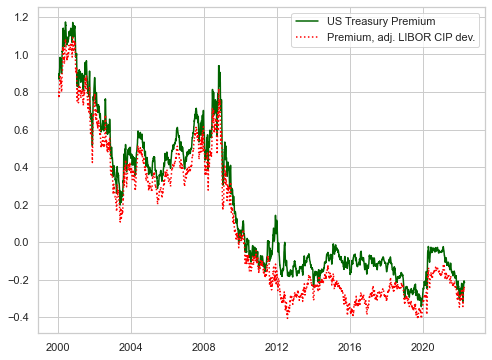

In [34]:
'''
Figure-2 of the paper - Not exactly same as we do not know how the author aggregated the different countries' Premiums into
a single value. But the observation of the author and the results our (assumed) methodology generates are approx. same.
'''

plt.figure(figsize=(8,6))
plt.plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CC_Mean'], label='US Treasury Premium', color='darkgreen')
plt.plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CC_Mean_Adj_CIP'], label='Premium, adj. LIBOR CIP dev.', linestyle=':', color='red')
plt.legend()
plt.savefig("Output/Fig_2_Average_US_Treasury_Premium.jpg")
plt.show()

### 5-year average U.S. Treasury Premium by country

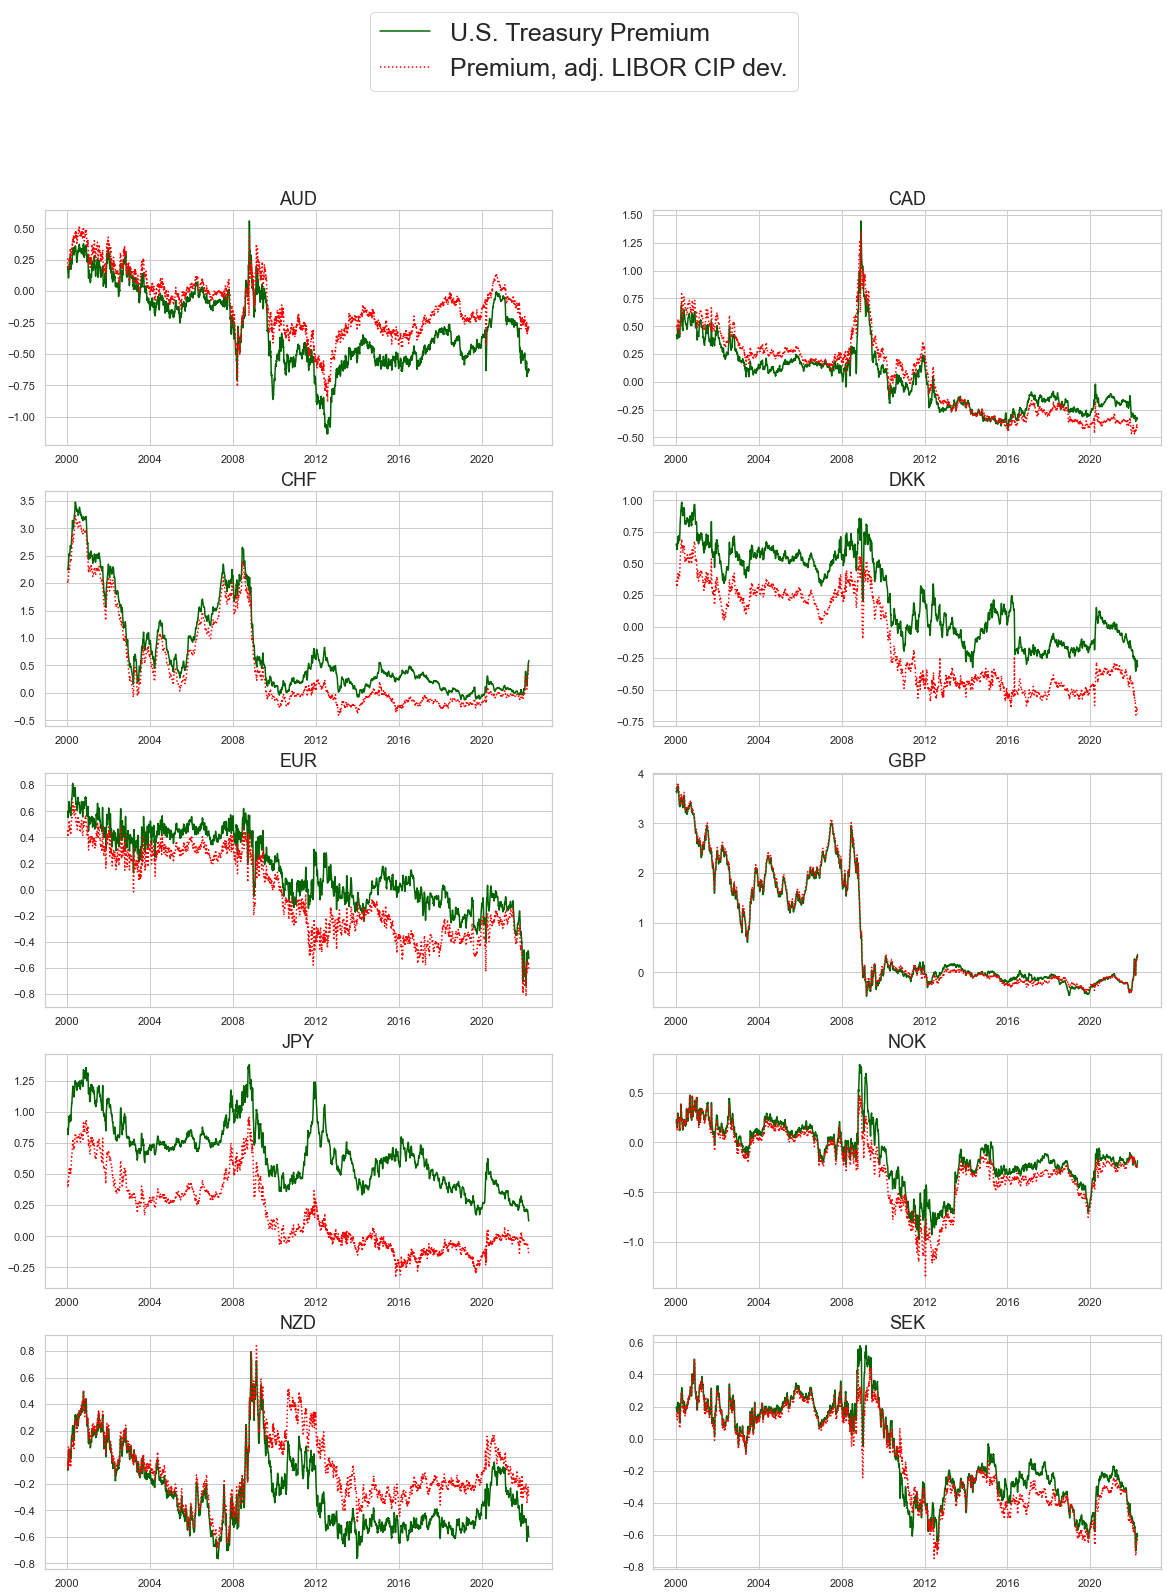

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,25))

axes[0][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['AUD'], color='darkgreen')
axes[0][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_AUD'], linestyle=':', color='red')
axes[0][0].set_title('AUD', fontsize=18)

axes[0][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CAD'], color='darkgreen')
axes[0][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_CAD'], linestyle=':', color='red')
axes[0][1].set_title('CAD', fontsize=18)

axes[1][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CHF'], color='darkgreen')
axes[1][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_CHF'], linestyle=':', color='red')
axes[1][0].set_title('CHF', fontsize=18)

axes[1][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['DKK'], color='darkgreen')
axes[1][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_DKK'], linestyle=':', color='red')
axes[1][1].set_title('DKK', fontsize=18)

axes[2][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['EUR'], color='darkgreen')
axes[2][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_EUR'], linestyle=':', color='red')
axes[2][0].set_title('EUR', fontsize=18)

axes[2][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['GBP'], color='darkgreen')
axes[2][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_GBP'], linestyle=':', color='red')
axes[2][1].set_title('GBP', fontsize=18)

axes[3][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['JPY'], color='darkgreen')
axes[3][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_JPY'], linestyle=':', color='red')
axes[3][0].set_title('JPY', fontsize=18)

axes[3][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['NOK'], color='darkgreen')
axes[3][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_NOK'], linestyle=':', color='red')
axes[3][1].set_title('NOK', fontsize=18)

axes[4][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['NZD'], color='darkgreen')
axes[4][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_NZD'], linestyle=':', color='red')
axes[4][0].set_title('NZD', fontsize=18)

axes[4][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['SEK'], color='darkgreen')
axes[4][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_SEK'], linestyle=':', color='red')
axes[4][1].set_title('SEK', fontsize=18)

fig.legend(['U.S. Treasury Premium', 'Premium, adj. LIBOR CIP dev.'], loc='upper center', fontsize=25)
plt.savefig("Output/Fig_3_US_Treasury_Premiums.jpg")

In [37]:
from functools import reduce
import dataframe_image as dfi

df_stats_full = df_US_Treasury_Premiums.iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'Full Sample'})
df_stats_2006 = df_US_Treasury_Premiums[df_US_Treasury_Premiums['Date']<='2006-12-31'].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2000-2006'})
df_stats_2009 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2006-12-31') & (df_US_Treasury_Premiums['Date']<='2009-12-31')].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2007-2009'})
df_stats_2016 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2009-12-31') & (df_US_Treasury_Premiums['Date']<='2016-12-31')].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2010-2016'})
df_stats_2021 = df_US_Treasury_Premiums[df_US_Treasury_Premiums['Date']>'2016-12-31'].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2017-2021'})

dfs_ss = [df_stats_full, df_stats_2006, df_stats_2009, df_stats_2016, df_stats_2021]

df_summary_stats = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss)
dfi.export(df_summary_stats,"Output/Table_1_Summary-Statistics.jpg")
df_summary_stats

Full Sample    2000-2006   2007-2009    2010-2016    2017-2021
AUD mean     -0.274442     0.049871   -0.158500    -0.584616    -0.357615
    sem       0.004039     0.003653    0.008494     0.003600     0.004037
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
CAD mean      0.020292     0.266418    0.293134    -0.177683    -0.197813
    sem       0.003708     0.003745    0.010263     0.003523     0.001684
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
CHF mean      0.768251     1.488871    1.421674     0.289132     0.079138
    sem       0.011386     0.021122    0.027252     0.004367     0.003320
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
DKK mean      0.237812     0.597210    0.555338     0.016215    -0.124142
    sem       0.004492     0.002980    0.004659     0.003503     0.002548
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
EUR mean      0.166233     0.472989    0.378175     0.024235    -0.171602
    sem       0.003757     0.002417    0.004403     0.002300     0.003732
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
GBP mean      0.784535     2.049544    1.415205    -0.013945    -0.187465
    sem       0.015110     0.016033    0.042539     0.002532     0.003497
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
JPY mean      0.674165     0.874277    0.887737     0.608120     0.375583
    sem       0.003499     0.004466    0.007538     0.003923     0.003345
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
NOK mean     -0.125777     0.157313    0.082524    -0.405539    -0.247437
    sem       0.003973     0.002683    0.008390     0.005522     0.003267
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
NZD mean     -0.266208    -0.081532   -0.161686    -0.391345    -0.403833
    sem       0.003790     0.005935    0.014709     0.004920     0.003905
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000
SEK mean     -0.078783     0.193951    0.245672    -0.287907    -0.346671
    sem       0.003830     0.002137    0.005016     0.003527     0.003691
    count  5805.000000  1819.000000  784.000000  1826.000000  1376.000000

In [38]:
from functools import reduce

df_stats_full = df_US_Treasury_Premiums.iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'Full Sample'})
df_stats_2006 = df_US_Treasury_Premiums[df_US_Treasury_Premiums['Date']<='2006-12-31'].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2000-2006'})
df_stats_2009 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2006-12-31') & (df_US_Treasury_Premiums['Date']<='2009-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2007-2009'})
df_stats_2016 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2009-12-31') & (df_US_Treasury_Premiums['Date']<='2016-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2010-2016'})
df_stats_2021 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2016-12-31') & (df_US_Treasury_Premiums['Date']<='2021-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2017-2021'})

dfs_ss = [df_stats_full, df_stats_2006, df_stats_2009, df_stats_2016, df_stats_2021]

df_summary_stats = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss)
dfi.export(df_summary_stats,"Output/Table_2_Average-US-Treasury-Premium-by-maturity.jpg")
df_summary_stats

,Full Sample,2000-2006,2007-2009,2010-2016,2017-2021
mean,0.220540,0.652773,0.523733,-0.070603,-0.133089
sem,0.005973,0.007004,0.014250,0.003799,0.003105
count,5805.000000,1819.000000,784.000000,1826.000000,1305.000000


In [39]:
#df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,:10].mean(axis=1)
#df_US_Treasury_Premiums['Avg_Adj_Tau_Premium'] = df_US_Treasury_Premiums.iloc[:,10:10].mean(axis=1)
df_US_Treasury_Premiums.drop(columns=['CC_Mean','CC_Mean_Adj_CIP'], inplace=True)

df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,1:11].mean(axis=1)
df_US_Treasury_Premiums['Avg_Adj_Tau_Premium'] = df_US_Treasury_Premiums.iloc[:,11:-1].mean(axis=1)
df_US_Treasury_Premiums

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/907076860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,1:11].mean(axis=1)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/907076860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,...,2.020500,0.353571,0.455000,3.692700,0.439786,0.206943,-0.046429,0.153571,0.896527,0.803743
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,...,2.026214,0.359286,0.449643,3.704129,0.426214,0.193514,-0.046429,0.153571,0.894292,0.801507
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,...,2.015500,0.347143,0.428571,3.690557,0.410986,0.184829,-0.056429,0.139286,0.882614,0.789830
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,...,2.012643,0.347143,0.416071,3.681986,0.405271,0.181971,-0.052143,0.139286,0.879507,0.786723
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,...,2.001214,0.334286,0.405714,3.669129,0.391700,0.158657,-0.055000,0.142857,0.868640,0.775856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_Premium_Avg = df_US_Treasury_Premiums.loc[:,['Date','Avg_Premium','Avg_Adj_Tau_Premium']].set_index('Date').dropna().rolling(7).mean().dropna().reset_index()
df_Premium_Avg

,Date,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-19,0.882152,0.789368
1,2000-01-20,0.879904,0.785620
2,2000-01-21,0.878039,0.782254
3,2000-01-24,0.879550,0.782266
4,2000-01-25,0.882110,0.783326
...,...,...,...
5794,2022-04-05,-0.211992,-0.241708
5795,2022-04-06,-0.210445,-0.240560
5796,2022-04-07,-0.209845,-0.240389
5797,2022-04-08,-0.210634,-0.241418


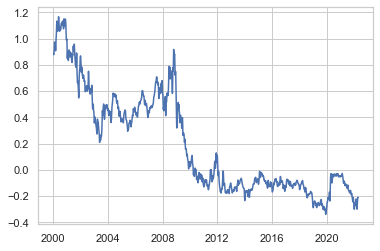

In [41]:
plt.plot(df_Premium_Avg['Date'],df_Premium_Avg['Avg_Premium'])

In [42]:
# Exporting the data from here to juxtapose against 10Y and 1Y

df_Premium_Avg.set_index('Date').to_csv('Output/Average_US_Tresury_Premium_5Y.csv')

In [43]:
# For Table-3, combining all the inputs variables - Government Yields, Interest Rate Swaps, and Basis Swaps data

dfs_Premium_Decomposition = [df_Govt_Yield_5Y.set_index('Date'), df_Int_Rate_Swap_5Y.set_index('Date'), df_Basis_Swaps_5Y.set_index('Date')]

df_rates_combined = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_Premium_Decomposition).reset_index()
df_rates_combined

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,...,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,6.5000,5.0700,6.2300,3.0000,1.0700,6.9000,6.3700,7.2200,6.0400,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
1,2000-01-04,6.3900,5.0800,6.2300,3.0000,1.0700,6.9000,6.3700,7.2200,6.0900,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
2,2000-01-05,6.4800,5.0900,6.2900,3.0000,1.0400,6.8400,6.4500,7.2200,6.0700,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
3,2000-01-06,6.4200,5.1100,6.3100,3.0300,1.0300,6.9300,6.3900,7.3100,6.1000,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,-0.295
4,2000-01-07,6.4200,4.9900,6.2600,3.0200,1.0800,6.9400,6.3800,7.3000,6.0800,...,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0200,-0.0425,-0.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.7413,0.4053,1.5347,0.3027,0.0196,2.7291,2.5159,3.1878,2.6398,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33250,-0.06750,0.29250,-0.0300,-0.0250,-0.370
5807,2022-04-06,2.7361,0.4178,1.5685,0.3503,0.0464,2.7999,2.4954,3.3563,2.7183,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.06790,0.30250,-0.0325,-0.0300,-0.370
5808,2022-04-07,2.7243,0.4494,1.5644,0.3758,0.0353,2.7548,2.4949,3.3629,2.7266,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07250,0.30500,-0.0325,-0.0350,-0.370
5809,2022-04-08,2.7936,0.4821,1.5839,0.3982,0.0239,2.7741,2.5704,3.3851,2.7284,...,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07433,0.30250,-0.0325,-0.0400,-0.370


In [44]:
df_rates_combined['Swap_Spread_USD'] = df_rates_combined['IRS_USD'] - df_rates_combined['USD']
df_rates_combined['Swap_Spread_EUR'] = df_rates_combined['IRS_EUR'] - df_rates_combined['EUR']
df_rates_combined['Swap_Spread_GBP'] = df_rates_combined['IRS_GBP'] - df_rates_combined['GBP']
df_rates_combined['Swap_Spread_CHF'] = df_rates_combined['IRS_CHF'] - df_rates_combined['CHF']
df_rates_combined['Swap_Spread_JPY'] = df_rates_combined['IRS_JPY'] - df_rates_combined['JPY']
df_rates_combined['Swap_Spread_AUD'] = df_rates_combined['IRS_AUD'] - df_rates_combined['AUD']
df_rates_combined['Swap_Spread_CAD'] = df_rates_combined['IRS_CAD'] - df_rates_combined['CAD']
df_rates_combined['Swap_Spread_NZD'] = df_rates_combined['IRS_NZD'] - df_rates_combined['NZD']
df_rates_combined['Swap_Spread_NOK'] = df_rates_combined['IRS_NOK'] - df_rates_combined['NOK']
df_rates_combined['Swap_Spread_SEK'] = df_rates_combined['IRS_SEK'] - df_rates_combined['SEK']
df_rates_combined['Swap_Spread_DKK'] = df_rates_combined['IRS_DKK'] - df_rates_combined['DKK']

df_Premium_Decomposition = df_rates_combined.drop(columns=['USD', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'IRS_USD', 'IRS_AUD', 'IRS_CAD', 'IRS_CHF',
                                                   'IRS_DKK', 'IRS_EUR', 'IRS_GBP', 'IRS_JPY', 'IRS_NOK', 'IRS_NZD', 'IRS_SEK'])
df_Premium_Decomposition

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,...,Swap_Spread_EUR,Swap_Spread_GBP,Swap_Spread_CHF,Swap_Spread_JPY,Swap_Spread_AUD,Swap_Spread_CAD,Swap_Spread_NZD,Swap_Spread_NOK,Swap_Spread_SEK,Swap_Spread_DKK
0,2000-01-03,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,...,0.2150,-2.992700,-1.3305,0.1700,0.3375,0.1500,0.7250,0.4860,0.5000,0.3400
1,2000-01-04,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,...,0.2250,-2.992700,-1.3305,0.2500,0.4500,0.2100,0.7250,0.5450,0.5150,0.3400
2,2000-01-05,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,...,0.1850,-3.052700,-1.3305,0.2400,0.4200,0.1800,0.7800,0.5800,0.5100,0.3300
3,2000-01-06,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0350,-0.0425,...,0.2250,-3.072700,-1.3605,0.2400,0.4100,0.1700,0.6650,0.4170,0.5850,0.3200
4,2000-01-07,-0.145095,0.055196,-0.240445,-0.42500,0.06500,0.08000,0.04000,-0.0200,-0.0425,...,0.2950,-3.022700,-1.3505,0.2465,0.4150,0.1700,0.7200,0.4419,0.5200,0.3250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,-0.081250,-0.023750,-0.072500,-0.26875,0.33250,-0.06750,0.29250,-0.0300,-0.0250,...,0.6237,-0.310825,-0.4627,0.1635,0.3359,0.4227,0.4109,0.2426,0.6673,0.7003
5807,2022-04-06,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.06790,0.30250,-0.0325,-0.0300,...,0.6112,-0.344625,-0.5103,0.1588,0.2701,0.4107,0.2937,0.2289,0.6424,0.6967
5808,2022-04-07,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07250,0.30500,-0.0325,-0.0350,...,0.6126,-0.340525,-0.5358,0.1648,0.3402,0.4297,0.3083,0.2109,0.6585,0.6815
5809,2022-04-08,-0.081250,-0.023750,-0.072500,-0.26875,0.33875,-0.07433,0.30250,-0.0325,-0.0400,...,0.6609,-0.360025,-0.5582,0.1812,0.3228,0.4086,0.3074,0.2086,0.6468,0.7114


In [45]:
df_Decomp_stats_full = df_Premium_Decomposition.iloc[:,1:11].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'Full Sample'}).unstack().rename(index = {
    'BS_EUR':'EUR',
    'BS_GBP':'GBP',
    'BS_CHF':'CHF',
    'BS_JPY':'JPY',
    'BS_AUD':'AUD',
    'BS_CAD':'CAD',
    'BS_NZD':'NZD',
    'BS_NOK':'NOK',
    'BS_SEK':'SEK',
    'BS_DKK':'DKK'}).stack()

df_Decomp_stats_2006 = df_Premium_Decomposition[df_Premium_Decomposition['Date']<='2006-12-31'].iloc[:,1:11].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2000-2006'}).unstack().rename(index = {
    'BS_EUR':'EUR',
    'BS_GBP':'GBP',
    'BS_CHF':'CHF',
    'BS_JPY':'JPY',
    'BS_AUD':'AUD',
    'BS_CAD':'CAD',
    'BS_NZD':'NZD',
    'BS_NOK':'NOK',
    'BS_SEK':'SEK',
    'BS_DKK':'DKK'}).stack()

df_Decomp_stats_2009 = df_Premium_Decomposition[(df_Premium_Decomposition['Date']>'2006-12-31') & (df_Premium_Decomposition['Date']<='2009-12-31')].iloc[:,1:11].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2007-2009'}).unstack().rename(index = {
    'BS_EUR':'EUR',
    'BS_GBP':'GBP',
    'BS_CHF':'CHF',
    'BS_JPY':'JPY',
    'BS_AUD':'AUD',
    'BS_CAD':'CAD',
    'BS_NZD':'NZD',
    'BS_NOK':'NOK',
    'BS_SEK':'SEK',
    'BS_DKK':'DKK'}).stack()

df_Decomp_stats_2016 = df_Premium_Decomposition[(df_Premium_Decomposition['Date']>'2009-12-31') & (df_Premium_Decomposition['Date']<='2016-12-31')].iloc[:,1:11].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2010-2016'}).unstack().rename(index = {
    'BS_EUR':'EUR',
    'BS_GBP':'GBP',
    'BS_CHF':'CHF',
    'BS_JPY':'JPY',
    'BS_AUD':'AUD',
    'BS_CAD':'CAD',
    'BS_NZD':'NZD',
    'BS_NOK':'NOK',
    'BS_SEK':'SEK',
    'BS_DKK':'DKK'}).stack()

df_Decomp_stats_2021 = df_Premium_Decomposition[(df_Premium_Decomposition['Date']>'2016-12-31') & (df_Premium_Decomposition['Date']<='2021-12-31')].iloc[:,1:11].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2017-2021'}).unstack().rename(index = {
    'BS_EUR':'EUR',
    'BS_GBP':'GBP',
    'BS_CHF':'CHF',
    'BS_JPY':'JPY',
    'BS_AUD':'AUD',
    'BS_CAD':'CAD',
    'BS_NZD':'NZD',
    'BS_NOK':'NOK',
    'BS_SEK':'SEK',
    'BS_DKK':'DKK'}).stack()

dfs_ss = [df_Decomp_stats_full, df_Decomp_stats_2006, df_Decomp_stats_2009, df_Decomp_stats_2016, df_Decomp_stats_2021]

df_summary_stats_BS = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss).sort_index()

columns = [('Cross-currency basis','Full Sample'), ('Cross-currency basis','2000-2006'), ('Cross-currency basis','2007-2009'), ('Cross-currency basis','2010-2016'), ('Cross-currency basis','2016-2021')]

df_summary_stats_BS.columns = pd.MultiIndex.from_tuples(columns)

dfs_temp = [df_summary_stats_BS['Cross-currency basis'],
            df_summary_stats_BS['Cross-currency basis'].unstack().mean().to_frame().T.stack().rename(index={0:'Non-USD'})
           ]

df_summary_stats_BS = pd.concat(dfs_temp, axis=0)

df_summary_stats_BS.columns = pd.MultiIndex.from_tuples(columns)
df_summary_stats_BS

Cross-currency basis                                        \
                      Full Sample     2000-2006     2007-2009 2010-2016   
AUD     mean             0.173499  9.467842e-02  9.271148e-02  0.245104   
        sem              0.001256  6.671097e-04  4.227635e-03  0.001263   
CAD     mean             0.031048  1.061062e-01  1.082490e-01  0.038991   
        sem              0.001424  8.671763e-04  3.421083e-03  0.001537   
CHF     mean            -0.275548 -2.404450e-01 -2.404450e-01 -0.387186   
        sem              0.001581  1.601798e-16  1.299393e-16  0.003064   
DKK     mean            -0.346494 -2.950000e-01 -2.950000e-01 -0.423945   
        sem              0.001318  7.292741e-17  1.706074e-16  0.003383   
EUR     mean            -0.196152 -1.450950e-01 -1.450950e-01 -0.272527   
        sem              0.001437  2.474323e-17  5.157897e-17  0.003387   
GBP     mean             0.010463  5.519600e-02  5.519600e-02 -0.042078   
        sem              0.000850  2.881284e-17  5.455468e-18  0.001561   
JPY     mean            -0.498916 -4.250000e-01 -4.250000e-01 -0.628752   
        sem              0.001920  2.344095e-16  2.221864e-16  0.003897   
NOK     mean            -0.098564 -4.279730e-02 -1.476719e-01 -0.149535   
        sem              0.001124  5.275880e-04  4.379697e-03  0.002062   
NZD     mean             0.178386  3.243749e-02  7.876594e-02  0.309071   
        sem              0.001823  7.325858e-04  3.103183e-03  0.001860   
SEK     mean            -0.042591 -1.830996e-02 -7.214241e-02 -0.032056   
        sem              0.000850  2.608647e-04  2.811334e-03  0.001966   
Non-USD mean            -0.106487 -8.782291e-02 -9.904318e-02 -0.134291   
        sem              0.001358  3.055324e-04  1.794293e-03  0.002398   

                        
             2016-2021  
AUD     mean  0.224284  
        sem   0.001698  
CAD     mean -0.123466  
        sem   0.001363  
CHF     mean -0.200319  
        sem   0.003126  
DKK     mean -0.342720  
        sem   0.001143  
EUR     mean -0.197339  
        sem   0.002763  
GBP     mean -0.003362  
        sem   0.001824  
JPY     mean -0.477128  
        sem   0.003769  
NOK     mean -0.080773  
        sem   0.001158  
NZD     mean  0.254380  
        sem   0.002011  
SEK     mean -0.074099  
        sem   0.001353  
Non-USD mean -0.102054  
        sem   0.002021

In [46]:
df_Decomp_stats_full = df_Premium_Decomposition.iloc[:,11:].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'Full Sample'}).unstack().rename(index = {
    'Swap_Spread_USD':'USD',
    'Swap_Spread_EUR':'EUR',
    'Swap_Spread_GBP':'GBP',
    'Swap_Spread_CHF':'CHF',
    'Swap_Spread_JPY':'JPY',
    'Swap_Spread_AUD':'AUD',
    'Swap_Spread_CAD':'CAD',
    'Swap_Spread_NZD':'NZD',
    'Swap_Spread_NOK':'NOK',
    'Swap_Spread_SEK':'SEK',
    'Swap_Spread_DKK':'DKK'}).stack()

df_Decomp_stats_2006 = df_Premium_Decomposition[df_Premium_Decomposition['Date']<='2006-12-31'].iloc[:,11:].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2000-2006'}).unstack().rename(index = {
    'Swap_Spread_USD':'USD',
    'Swap_Spread_EUR':'EUR',
    'Swap_Spread_GBP':'GBP',
    'Swap_Spread_CHF':'CHF',
    'Swap_Spread_JPY':'JPY',
    'Swap_Spread_AUD':'AUD',
    'Swap_Spread_CAD':'CAD',
    'Swap_Spread_NZD':'NZD',
    'Swap_Spread_NOK':'NOK',
    'Swap_Spread_SEK':'SEK',
    'Swap_Spread_DKK':'DKK'}).stack()

df_Decomp_stats_2009 = df_Premium_Decomposition[(df_Premium_Decomposition['Date']>'2006-12-31') & (df_Premium_Decomposition['Date']<='2009-12-31')].iloc[:,11:].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2007-2009'}).unstack().rename(index = {
    'Swap_Spread_USD':'USD',
    'Swap_Spread_EUR':'EUR',
    'Swap_Spread_GBP':'GBP',
    'Swap_Spread_CHF':'CHF',
    'Swap_Spread_JPY':'JPY',
    'Swap_Spread_AUD':'AUD',
    'Swap_Spread_CAD':'CAD',
    'Swap_Spread_NZD':'NZD',
    'Swap_Spread_NOK':'NOK',
    'Swap_Spread_SEK':'SEK',
    'Swap_Spread_DKK':'DKK'}).stack()

df_Decomp_stats_2016 = df_Premium_Decomposition[(df_Premium_Decomposition['Date']>'2009-12-31') & (df_Premium_Decomposition['Date']<='2016-12-31')].iloc[:,11:].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2010-2016'}).unstack().rename(index = {
    'Swap_Spread_USD':'USD',
    'Swap_Spread_EUR':'EUR',
    'Swap_Spread_GBP':'GBP',
    'Swap_Spread_CHF':'CHF',
    'Swap_Spread_JPY':'JPY',
    'Swap_Spread_AUD':'AUD',
    'Swap_Spread_CAD':'CAD',
    'Swap_Spread_NZD':'NZD',
    'Swap_Spread_NOK':'NOK',
    'Swap_Spread_SEK':'SEK',
    'Swap_Spread_DKK':'DKK'}).stack()

df_Decomp_stats_2021 = df_Premium_Decomposition[(df_Premium_Decomposition['Date']>'2016-12-31') & (df_Premium_Decomposition['Date']<='2021-12-31')].iloc[:,11:].agg(['mean','sem']).T.stack().to_frame().rename(columns={0:'2017-2021'}).unstack().rename(index = {
    'Swap_Spread_USD':'USD',
    'Swap_Spread_EUR':'EUR',
    'Swap_Spread_GBP':'GBP',
    'Swap_Spread_CHF':'CHF',
    'Swap_Spread_JPY':'JPY',
    'Swap_Spread_AUD':'AUD',
    'Swap_Spread_CAD':'CAD',
    'Swap_Spread_NZD':'NZD',
    'Swap_Spread_NOK':'NOK',
    'Swap_Spread_SEK':'SEK',
    'Swap_Spread_DKK':'DKK'}).stack()

dfs_ss = [df_Decomp_stats_full, df_Decomp_stats_2006, df_Decomp_stats_2009, df_Decomp_stats_2016, df_Decomp_stats_2021]

df_summary_stats_SS = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss).sort_index()

columns = [('Swap spread','Full Sample'), ('Swap spread','2000-2006'), ('Swap spread','2007-2009'), ('Swap spread','2010-2016'), ('Swap spread','2016-2021')]

df_summary_stats_SS.columns = pd.MultiIndex.from_tuples(columns)

dfs_temp = [df_summary_stats_SS['Swap spread'].iloc[:-2,:],
            df_summary_stats_SS['Swap spread'].unstack().mean().to_frame().T.stack().rename(index={0:'Non-USD'}),
            df_summary_stats_SS['Swap spread'].iloc[-2:,:]
           ]

df_summary_stats_SS = pd.concat(dfs_temp, axis=0)

df_summary_stats_SS.columns = pd.MultiIndex.from_tuples(columns)
df_summary_stats_SS

Swap spread                                        
             Full Sample 2000-2006 2007-2009 2010-2016 2016-2021
AUD     mean    0.408667  0.388182  0.710748  0.468760  0.176029
        sem     0.003154  0.002609  0.011033  0.004756  0.002759
CAD     mean    0.256292  0.160125  0.241468  0.268659  0.370185
        sem     0.002115  0.002183  0.010503  0.002768  0.001537
CHF     mean   -0.185669 -0.716877 -0.533387  0.227263  0.186044
        sem     0.008455  0.017075  0.022275  0.002687  0.002388
DKK     mean    0.416436  0.230850  0.382304  0.538261  0.514252
        sem     0.002367  0.002467  0.006529  0.002866  0.002201
EUR     mean    0.337775  0.204803  0.410274  0.378257  0.404300
        sem     0.002217  0.002935  0.006692  0.003438  0.003039
GBP     mean   -0.488570 -1.574804 -0.819165  0.185686  0.260290
        sem     0.012557  0.012586  0.039343  0.002543  0.001763
JPY     mean    0.132632  0.083701  0.180811  0.149882  0.148341
        sem     0.000801  0.001407  0.001794  0.000868  0.001434
NOK     mean    0.531827  0.418531  0.707642  0.684768  0.385430
        sem     0.003652  0.003033  0.007900  0.008616  0.002482
NZD     mean    0.395818  0.582748  0.724791  0.212046  0.198451
        sem     0.004185  0.004237  0.017235  0.004518  0.003382
SEK     mean    0.429232  0.357267  0.469028  0.450085  0.464030
        sem     0.002284  0.003628  0.009194  0.004068  0.002189
Non-USD mean    0.231107  0.060661  0.283389  0.335741  0.287487
        sem     0.004136  0.005147  0.012802  0.003627  0.002250
USD     mean    0.307735  0.532740  0.642760  0.129480  0.055007
        sem     0.003711  0.004463  0.008319  0.002771  0.001576

In [47]:
#Table-3 of the Research Paper

dfs_SS_BS = [df_summary_stats_SS, df_summary_stats_BS]

df_Decomposition_Stats = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_SS_BS).fillna('')

# Formatting as per the research paper

dfs_temp = [df_Decomposition_Stats.iloc[:-6], df_Decomposition_Stats.iloc[-4:-2], df_Decomposition_Stats.iloc[-6:-4], df_Decomposition_Stats.iloc[-2:]]

df_Decomposition_Stats = pd.concat(dfs_temp, axis=0)
dfi.export(df_Decomposition_Stats,"Output/Table_3_Decomposition-of-the-US-Treasury-Premium.jpg")
df_Decomposition_Stats

Swap spread                                          \
             Full Sample 2000-2006 2007-2009 2010-2016 2016-2021   
AUD     mean    0.408667  0.388182  0.710748  0.468760  0.176029   
        sem     0.003154  0.002609  0.011033  0.004756  0.002759   
CAD     mean    0.256292  0.160125  0.241468  0.268659  0.370185   
        sem     0.002115  0.002183  0.010503  0.002768  0.001537   
CHF     mean   -0.185669 -0.716877 -0.533387  0.227263  0.186044   
        sem     0.008455  0.017075  0.022275  0.002687  0.002388   
DKK     mean    0.416436  0.230850  0.382304  0.538261  0.514252   
        sem     0.002367  0.002467  0.006529  0.002866  0.002201   
EUR     mean    0.337775  0.204803  0.410274  0.378257  0.404300   
        sem     0.002217  0.002935  0.006692  0.003438  0.003039   
GBP     mean   -0.488570 -1.574804 -0.819165  0.185686  0.260290   
        sem     0.012557  0.012586  0.039343  0.002543  0.001763   
JPY     mean    0.132632  0.083701  0.180811  0.149882  0.148341   
        sem     0.000801  0.001407  0.001794  0.000868  0.001434   
NOK     mean    0.531827  0.418531  0.707642  0.684768  0.385430   
        sem     0.003652  0.003033  0.007900  0.008616  0.002482   
NZD     mean    0.395818  0.582748  0.724791  0.212046  0.198451   
        sem     0.004185  0.004237  0.017235  0.004518  0.003382   
SEK     mean    0.429232  0.357267  0.469028  0.450085  0.464030   
        sem     0.002284  0.003628  0.009194  0.004068  0.002189   
Non-USD mean    0.231107  0.060661  0.283389  0.335741  0.287487   
        sem     0.004136  0.005147  0.012802  0.003627  0.002250   
USD     mean    0.307735  0.532740  0.642760  0.129480  0.055007   
        sem     0.003711  0.004463  0.008319  0.002771  0.001576   

             Cross-currency basis                                          
                      Full Sample 2000-2006 2007-2009 2010-2016 2016-2021  
AUD     mean             0.173499  0.094678  0.092711  0.245104  0.224284  
        sem              0.001256  0.000667  0.004228  0.001263  0.001698  
CAD     mean             0.031048  0.106106  0.108249  0.038991 -0.123466  
        sem              0.001424  0.000867  0.003421  0.001537  0.001363  
CHF     mean            -0.275548 -0.240445 -0.240445 -0.387186 -0.200319  
        sem              0.001581       0.0       0.0  0.003064  0.003126  
DKK     mean            -0.346494    -0.295    -0.295 -0.423945  -0.34272  
        sem              0.001318       0.0       0.0  0.003383  0.001143  
EUR     mean            -0.196152 -0.145095 -0.145095 -0.272527 -0.197339  
        sem              0.001437       0.0       0.0  0.003387  0.002763  
GBP     mean             0.010463  0.055196  0.055196 -0.042078 -0.003362  
        sem               0.00085       0.0       0.0  0.001561  0.001824  
JPY     mean            -0.498916    -0.425    -0.425 -0.628752 -0.477128  
        sem               0.00192       0.0       0.0  0.003897  0.003769  
NOK     mean            -0.098564 -0.042797 -0.147672 -0.149535 -0.080773  
        sem              0.001124  0.000528   0.00438  0.002062  0.001158  
NZD     mean             0.178386  0.032437  0.078766  0.309071   0.25438  
        sem              0.001823  0.000733  0.003103   0.00186  0.002011  
SEK     mean            -0.042591  -0.01831 -0.072142 -0.032056 -0.074099  
        sem               0.00085  0.000261  0.002811  0.001966  0.001353  
Non-USD mean            -0.106487 -0.087823 -0.099043 -0.134291 -0.102054  
        sem              0.001358  0.000306  0.001794  0.002398  0.002021  
USD     mean                                                               
        sem

### Using OIS as alternative risk-free rate
- Essentially, here, we are using OIS instead of LIBOR (i.e., Interest Rate Swap rate) as the risk-free rate proxy.
- Decline in the medium-to long-term U.S. Treasury Premium is robust to the choice of the Overnight Indexed Swap (OIS) rate as the risk-free rate.
- The OIS is indexed to the overnight rate, which contains very little credit risk, and is unaffected by frictions in the Libor rate.

##### CIP deviations for OIS rates

   **Tau_OIS(i,n,t)** = (OIS(i,n,t) − OIS(USD,n,t)) − MiFP(i,n,t)

   **Premium adj. for OIS CIP Dev** = US_Treasury_Premium(i,n,t) − Tau_OIS(i,n,t) = (OIS(USD,n,t) − GovtYield(USD,n,t)) − (OIS(i,n,t) − GovtYield(i,n,t))

In [48]:
# Importing the OIS dataset

df_OIS_5Y = pd.read_excel('5Y/OIS-Swap-Rates_Data_5Y.xlsx')

In [49]:
actual_colnames_OIS_5Y = {'USSO5 Curncy  (R3)':'OIS_USD',
                                 'EUSWE5 Curncy  (L2)':'OIS_EUR',
                                 'BPSWS5 Curncy  (L3)':'OIS_GBP',
                                 'SFSWT5 Curncy  (L1)':'OIS_CHF',
                                 'JYSO5 Curncy  (R1)':'OIS_JPY',
                                 'ADSO5 Curncy  (R4)':'OIS_AUD',
                                 'CDSO5 Curncy  (R2)':'OIS_CAD',
                                 'NDSO105 Curncy  (R1)':'OIS_NZD'
                  }

df_OIS_5Y.rename(columns=actual_colnames_OIS_5Y, inplace=True)

In [50]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_OIS_5Y = df_OIS_5Y.bfill(axis='rows').ffill(axis='rows')
df_OIS_5Y

,Date,OIS_USD,OIS_EUR,OIS_GBP,OIS_CHF,OIS_JPY,OIS_AUD,OIS_CAD,OIS_NZD
0,2002-02-13,4.7340,3.970,5.2855,0.2758,0.6025,5.498,2.7145,NaN
1,2002-02-14,4.7040,3.970,5.2855,0.2758,0.6025,5.498,2.7145,NaN
2,2002-02-15,4.6060,3.970,5.2855,0.2758,0.6025,5.498,2.7145,NaN
3,2002-02-18,4.6060,3.970,5.2855,0.2758,0.6025,5.498,2.7145,NaN
4,2002-02-19,4.6190,3.970,5.2855,0.2758,0.6025,5.498,2.7145,NaN
...,...,...,...,...,...,...,...,...,...
5250,2022-04-05,2.4811,-0.087,1.9290,-0.3125,0.1250,2.753,2.6320,NaN
5251,2022-04-06,2.4695,-0.087,1.9485,-0.3125,0.1462,2.839,2.5910,NaN
5252,2022-04-07,2.4958,-0.087,1.9757,-0.3125,0.1412,2.785,2.6000,NaN
5253,2022-04-08,2.5557,-0.087,2.0020,-0.3125,0.1462,2.825,2.6610,NaN


In [51]:
# Drop NZD column as it contains all NAs

df_OIS_5Y.dropna(axis=1, inplace=True)
df_OIS_5Y

,Date,OIS_USD,OIS_EUR,OIS_GBP,OIS_CHF,OIS_JPY,OIS_AUD,OIS_CAD
0,2002-02-13,4.7340,3.970,5.2855,0.2758,0.6025,5.498,2.7145
1,2002-02-14,4.7040,3.970,5.2855,0.2758,0.6025,5.498,2.7145
2,2002-02-15,4.6060,3.970,5.2855,0.2758,0.6025,5.498,2.7145
3,2002-02-18,4.6060,3.970,5.2855,0.2758,0.6025,5.498,2.7145
4,2002-02-19,4.6190,3.970,5.2855,0.2758,0.6025,5.498,2.7145
...,...,...,...,...,...,...,...,...
5250,2022-04-05,2.4811,-0.087,1.9290,-0.3125,0.1250,2.753,2.6320
5251,2022-04-06,2.4695,-0.087,1.9485,-0.3125,0.1462,2.839,2.5910
5252,2022-04-07,2.4958,-0.087,1.9757,-0.3125,0.1412,2.785,2.6000
5253,2022-04-08,2.5557,-0.087,2.0020,-0.3125,0.1462,2.825,2.6610


In [52]:
#Converting the Basis Swap value into percentage terms from basis terms by dividing it by 100

#df_OIS_5Y = (df_OIS_5Y.set_index('Date')/10000.0).reset_index()
#df_OIS_5Y

In [53]:
df_MiFP

,Date,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,-2.030095,-3.877504,-5.740945,-6.35500,0.13250,-0.57000,0.81500,-0.6790,-1.7350,-1.1425
1,2000-01-04,-1.930095,-3.797504,-5.660945,-6.19500,0.32500,-0.43000,0.89500,-0.4900,-1.6550,-1.0075
2,2000-01-05,-2.030095,-3.867504,-5.730945,-6.30500,0.16500,-0.45000,0.88000,-0.5450,-1.7350,-1.0725
3,2000-01-06,-1.920095,-3.817504,-5.680945,-6.26500,0.29500,-0.47000,0.90500,-0.6280,-1.6550,-0.9775
4,2000-01-07,-1.940095,-3.787504,-5.650945,-6.17850,0.34000,-0.45000,0.98000,-0.5781,-1.6900,-1.0125
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,-1.792150,-1.539775,-2.972400,-2.82555,0.65760,0.13120,1.15130,0.1125,-1.7489,-0.9199
5807,2022-04-06,-1.783750,-1.531375,-2.964000,-2.79505,0.67725,0.10670,1.22100,0.1832,-1.7395,-0.8533
5808,2022-04-07,-1.776650,-1.557275,-2.989900,-2.82605,0.67635,0.09470,1.21880,0.1476,-1.7369,-0.8504
5809,2022-04-08,-1.756250,-1.617875,-3.050500,-2.88165,0.61765,0.08667,1.17700,0.0865,-1.7460,-0.8780


In [54]:
# Calculation of Tau OIS

'''First merge the OIS and MiFP datasets'''

dfs_OIS_MiFP = [df_OIS_5Y.set_index('Date'), df_MiFP.set_index('Date')]

df_OIS_MiFP = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_OIS_MiFP).dropna(axis=0).reset_index()
df_OIS_MiFP

,Date,OIS_USD,OIS_EUR,OIS_GBP,OIS_CHF,OIS_JPY,OIS_AUD,OIS_CAD,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2002-02-13,4.7340,3.970,5.2855,0.2758,0.6025,5.498,2.7145,-0.343795,-1.637504,-3.500945,-4.76100,1.07620,0.08250,1.94000,1.8350,-0.0525,0.5895
1,2002-02-14,4.7040,3.970,5.2855,0.2758,0.6025,5.498,2.7145,-0.279595,-1.607504,-3.470945,-4.73750,1.21750,0.12000,1.97000,1.8600,-0.0547,0.5797
2,2002-02-15,4.6060,3.970,5.2855,0.2758,0.6025,5.498,2.7145,-0.227095,-1.537504,-3.400945,-4.67750,1.27250,0.07000,2.05000,1.9400,-0.0050,0.6032
3,2002-02-18,4.6060,3.970,5.2855,0.2758,0.6025,5.498,2.7145,-0.185595,-1.526504,-3.389945,-4.66150,1.25850,0.10850,2.01100,1.9410,-0.0390,0.6385
4,2002-02-19,4.6190,3.970,5.2855,0.2758,0.6025,5.498,2.7145,-0.278795,-1.537504,-3.400945,-4.65630,1.17250,0.11250,1.98450,1.9075,-0.0350,0.6075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,2022-04-05,2.4811,-0.087,1.9290,-0.3125,0.1250,2.753,2.6320,-1.792150,-1.539775,-2.972400,-2.82555,0.65760,0.13120,1.15130,0.1125,-1.7489,-0.9199
5251,2022-04-06,2.4695,-0.087,1.9485,-0.3125,0.1462,2.839,2.5910,-1.783750,-1.531375,-2.964000,-2.79505,0.67725,0.10670,1.22100,0.1832,-1.7395,-0.8533
5252,2022-04-07,2.4958,-0.087,1.9757,-0.3125,0.1412,2.785,2.6000,-1.776650,-1.557275,-2.989900,-2.82605,0.67635,0.09470,1.21880,0.1476,-1.7369,-0.8504
5253,2022-04-08,2.5557,-0.087,2.0020,-0.3125,0.1462,2.825,2.6610,-1.756250,-1.617875,-3.050500,-2.88165,0.61765,0.08667,1.17700,0.0865,-1.7460,-0.8780


In [55]:
df_OIS_MiFP['Tau_OIS_AUD'] = (df_OIS_MiFP['OIS_AUD'] - df_OIS_MiFP['OIS_USD']) - df_OIS_MiFP['MiFP_AUD']
df_OIS_MiFP['Tau_OIS_CAD'] = (df_OIS_MiFP['OIS_CAD'] - df_OIS_MiFP['OIS_USD']) - df_OIS_MiFP['MiFP_CAD']
df_OIS_MiFP['Tau_OIS_CHF'] = (df_OIS_MiFP['OIS_CHF'] - df_OIS_MiFP['OIS_USD']) - df_OIS_MiFP['MiFP_CHF']
df_OIS_MiFP['Tau_OIS_EUR'] = (df_OIS_MiFP['OIS_EUR'] - df_OIS_MiFP['OIS_USD']) - df_OIS_MiFP['MiFP_EUR']
df_OIS_MiFP['Tau_OIS_GBP'] = (df_OIS_MiFP['OIS_GBP'] - df_OIS_MiFP['OIS_USD']) - df_OIS_MiFP['MiFP_GBP']
df_OIS_MiFP['Tau_OIS_JPY'] = (df_OIS_MiFP['OIS_JPY'] - df_OIS_MiFP['OIS_USD']) - df_OIS_MiFP['MiFP_JPY']

df_OIS_MiFP = df_OIS_MiFP[['Date', 'Tau_OIS_AUD', 'Tau_OIS_CAD', 'Tau_OIS_CHF', 'Tau_OIS_EUR', 'Tau_OIS_GBP', 'Tau_OIS_JPY']]
df_OIS_MiFP

,Date,Tau_OIS_AUD,Tau_OIS_CAD,Tau_OIS_CHF,Tau_OIS_EUR,Tau_OIS_GBP,Tau_OIS_JPY
0,2002-02-13,-0.31220,-2.10200,-0.957255,-0.420205,2.189004,0.62950
1,2002-02-14,-0.42350,-2.10950,-0.957255,-0.454405,2.189004,0.63600
2,2002-02-15,-0.38050,-1.96150,-0.929255,-0.408905,2.217004,0.67400
3,2002-02-18,-0.36650,-2.00000,-0.940255,-0.450405,2.206004,0.65800
4,2002-02-19,-0.29350,-2.01700,-0.942255,-0.370205,2.204004,0.63980
...,...,...,...,...,...,...,...
5250,2022-04-05,-0.38570,0.01970,0.178800,-0.775950,0.987675,0.46945
5251,2022-04-06,-0.30775,0.01480,0.182000,-0.772750,1.010375,0.47175
5252,2022-04-07,-0.38715,0.00950,0.181600,-0.806150,1.037175,0.47145
5253,2022-04-08,-0.34835,0.01863,0.182300,-0.886450,1.064175,0.47215


In [56]:
df_US_Trsy_Prm_OIS = df_US_Treasury_Premiums.copy()
df_US_Trsy_Prm_OIS

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-11,0.196786,0.420000,2.260945,0.648571,0.600095,3.637504,0.864786,0.226943,-0.086429,...,2.020500,0.353571,0.455000,3.692700,0.439786,0.206943,-0.046429,0.153571,0.896527,0.803743
1,2000-01-12,0.183929,0.420000,2.266659,0.654286,0.594738,3.648933,0.851214,0.213514,-0.086429,...,2.026214,0.359286,0.449643,3.704129,0.426214,0.193514,-0.046429,0.153571,0.894292,0.801507
2,2000-01-13,0.172143,0.420714,2.255945,0.642143,0.573666,3.635361,0.835986,0.204829,-0.096429,...,2.015500,0.347143,0.428571,3.690557,0.410986,0.184829,-0.056429,0.139286,0.882614,0.789830
3,2000-01-14,0.168571,0.421429,2.253088,0.642143,0.561166,3.626790,0.830271,0.201971,-0.092143,...,2.012643,0.347143,0.416071,3.681986,0.405271,0.181971,-0.052143,0.139286,0.879507,0.786723
4,2000-01-17,0.153571,0.411429,2.241659,0.629286,0.550809,3.613933,0.816700,0.178657,-0.095000,...,2.001214,0.334286,0.405714,3.669129,0.391700,0.158657,-0.055000,0.142857,0.868640,0.775856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
dfs_TrsyPrm_TauOIS = [df_US_Trsy_Prm_OIS.set_index('Date'), df_OIS_MiFP.set_index('Date')]

df_TrsyPrm_TauOIS = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_TrsyPrm_TauOIS).dropna(axis=0)
df_TrsyPrm_TauOIS

,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK,...,Adj_Tau_NZD,Adj_Tau_SEK,Avg_Premium,Avg_Adj_Tau_Premium,Tau_OIS_AUD,Tau_OIS_CAD,Tau_OIS_CHF,Tau_OIS_EUR,Tau_OIS_GBP,Tau_OIS_JPY
Date,,,,,,,,,,,,,,,,,,,,,
2002-02-13,0.171971,0.347857,2.220945,0.523743,0.431552,2.240361,1.002400,0.120000,0.036071,0.210757,...,0.046071,0.183257,0.730566,0.637531,-0.31220,-2.10200,-0.957255,-0.420205,2.189004,0.62950
2002-02-14,0.163571,0.344643,2.232374,0.521557,0.443381,2.263218,1.004900,0.115714,0.040857,0.209014,...,0.050857,0.184014,0.733923,0.645389,-0.42350,-2.10950,-0.957255,-0.454405,2.189004,0.63600
2002-02-15,0.155714,0.347500,2.233802,0.511557,0.452066,2.270361,0.999000,0.112500,0.043714,0.206057,...,0.053714,0.183557,0.733227,0.643693,-0.38050,-1.96150,-0.929255,-0.408905,2.217004,0.67400
2002-02-18,0.145929,0.343786,2.225088,0.499986,0.440895,2.261647,0.988214,0.103071,0.036429,0.203057,...,0.046429,0.180557,0.724810,0.636776,-0.36650,-2.00000,-0.940255,-0.450405,2.206004,0.65800
2002-02-19,0.143786,0.336643,2.216516,0.499457,0.456424,2.258790,0.985543,0.099500,0.033500,0.200200,...,0.043500,0.172700,0.723036,0.630251,-0.29350,-2.01700,-0.942255,-0.370205,2.204004,0.63980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,-0.620079,-0.328557,0.550129,-0.282200,-0.476521,0.302661,0.140493,-0.217136,-0.573929,-0.597786,...,-0.281429,-0.622786,-0.210292,-0.241667,-0.38570,0.01970,0.178800,-0.775950,0.987675,0.46945
2022-04-06,-0.624593,-0.333457,0.557629,-0.294229,-0.489036,0.311918,0.133093,-0.214179,-0.585986,-0.603343,...,-0.283486,-0.633343,-0.214218,-0.244758,-0.30775,0.01480,0.182000,-0.772750,1.010375,0.47175
2022-04-07,-0.633121,-0.335343,0.563757,-0.296700,-0.495050,0.323275,0.131336,-0.205150,-0.594743,-0.601629,...,-0.289743,-0.636629,-0.214337,-0.245587,-0.38715,0.00950,0.181600,-0.806150,1.037175,0.47145


In [58]:
# Removing the unwanted columns

df_TrsyPrm_TauOIS.drop(columns=['Avg_Premium', 'Avg_Adj_Tau_Premium', 'DKK', 'NOK', 'NZD', 'SEK', 'Adj_Tau_DKK', 'Adj_Tau_NOK', 'Adj_Tau_NZD', 'Adj_Tau_SEK'], inplace=True)
df_TrsyPrm_TauOIS

,AUD,CAD,CHF,EUR,GBP,JPY,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Tau_OIS_AUD,Tau_OIS_CAD,Tau_OIS_CHF,Tau_OIS_EUR,Tau_OIS_GBP,Tau_OIS_JPY
Date,,,,,,,,,,,,,,,,,,
2002-02-13,0.171971,0.347857,2.220945,0.431552,2.240361,1.002400,0.236971,0.475357,1.980500,0.286457,2.295557,0.577400,-0.31220,-2.10200,-0.957255,-0.420205,2.189004,0.62950
2002-02-14,0.163571,0.344643,2.232374,0.443381,2.263218,1.004900,0.271071,0.472143,1.991929,0.298286,2.318414,0.579900,-0.42350,-2.10950,-0.957255,-0.454405,2.189004,0.63600
2002-02-15,0.155714,0.347500,2.233802,0.452066,2.270361,0.999000,0.250714,0.475000,1.993357,0.306971,2.325557,0.574000,-0.38050,-1.96150,-0.929255,-0.408905,2.217004,0.67400
2002-02-18,0.145929,0.343786,2.225088,0.440895,2.261647,0.988214,0.255929,0.471286,1.984643,0.295800,2.316843,0.563214,-0.36650,-2.00000,-0.940255,-0.450405,2.206004,0.65800
2002-02-19,0.143786,0.336643,2.216516,0.456424,2.258790,0.985543,0.208786,0.464143,1.976071,0.311329,2.313986,0.560543,-0.29350,-2.01700,-0.942255,-0.370205,2.204004,0.63980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,-0.620079,-0.328557,0.550129,-0.476521,0.302661,0.140493,-0.287579,-0.396057,0.477629,-0.557771,0.278911,-0.128257,-0.38570,0.01970,0.178800,-0.775950,0.987675,0.46945
2022-04-06,-0.624593,-0.333457,0.557629,-0.489036,0.311918,0.133093,-0.285843,-0.401357,0.485129,-0.570286,0.288168,-0.135657,-0.30775,0.01480,0.182000,-0.772750,1.010375,0.47175
2022-04-07,-0.633121,-0.335343,0.563757,-0.495050,0.323275,0.131336,-0.294371,-0.407843,0.491257,-0.576300,0.299525,-0.137414,-0.38715,0.00950,0.181600,-0.806150,1.037175,0.47145


In [59]:
df_TrsyPrm_TauOIS['Adj_Tau_OIS_AUD'] = df_TrsyPrm_TauOIS['AUD'] - df_TrsyPrm_TauOIS['Tau_OIS_AUD']
df_TrsyPrm_TauOIS['Adj_Tau_OIS_CAD'] = df_TrsyPrm_TauOIS['CAD'] - df_TrsyPrm_TauOIS['Tau_OIS_CAD']
df_TrsyPrm_TauOIS['Adj_Tau_OIS_CHF'] = df_TrsyPrm_TauOIS['CHF'] - df_TrsyPrm_TauOIS['Tau_OIS_CHF']
df_TrsyPrm_TauOIS['Adj_Tau_OIS_EUR'] = df_TrsyPrm_TauOIS['EUR'] - df_TrsyPrm_TauOIS['Tau_OIS_EUR']
df_TrsyPrm_TauOIS['Adj_Tau_OIS_GBP'] = df_TrsyPrm_TauOIS['GBP'] - df_TrsyPrm_TauOIS['Tau_OIS_GBP']
df_TrsyPrm_TauOIS['Adj_Tau_OIS_JPY'] = df_TrsyPrm_TauOIS['JPY'] - df_TrsyPrm_TauOIS['Tau_OIS_JPY']

df_TrsyPrm_TauOIS.drop(columns=['Tau_OIS_AUD', 'Tau_OIS_CAD', 'Tau_OIS_CHF', 'Tau_OIS_EUR', 'Tau_OIS_GBP', 'Tau_OIS_JPY'], inplace=True)
df_TrsyPrm_TauOIS = df_TrsyPrm_TauOIS.reset_index()
df_TrsyPrm_TauOIS

,Date,AUD,CAD,CHF,EUR,GBP,JPY,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_OIS_AUD,Adj_Tau_OIS_CAD,Adj_Tau_OIS_CHF,Adj_Tau_OIS_EUR,Adj_Tau_OIS_GBP,Adj_Tau_OIS_JPY
0,2002-02-13,0.171971,0.347857,2.220945,0.431552,2.240361,1.002400,0.236971,0.475357,1.980500,0.286457,2.295557,0.577400,0.484171,2.449857,3.178200,0.851757,0.051357,0.372900
1,2002-02-14,0.163571,0.344643,2.232374,0.443381,2.263218,1.004900,0.271071,0.472143,1.991929,0.298286,2.318414,0.579900,0.587071,2.454143,3.189629,0.897786,0.074214,0.368900
2,2002-02-15,0.155714,0.347500,2.233802,0.452066,2.270361,0.999000,0.250714,0.475000,1.993357,0.306971,2.325557,0.574000,0.536214,2.309000,3.163057,0.860971,0.053357,0.325000
3,2002-02-18,0.145929,0.343786,2.225088,0.440895,2.261647,0.988214,0.255929,0.471286,1.984643,0.295800,2.316843,0.563214,0.512429,2.343786,3.165343,0.891300,0.055643,0.330214
4,2002-02-19,0.143786,0.336643,2.216516,0.456424,2.258790,0.985543,0.208786,0.464143,1.976071,0.311329,2.313986,0.560543,0.437286,2.353643,3.158771,0.826629,0.054786,0.345743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,2022-04-05,-0.620079,-0.328557,0.550129,-0.476521,0.302661,0.140493,-0.287579,-0.396057,0.477629,-0.557771,0.278911,-0.128257,-0.234379,-0.348257,0.371329,0.299429,-0.685014,-0.328957
5251,2022-04-06,-0.624593,-0.333457,0.557629,-0.489036,0.311918,0.133093,-0.285843,-0.401357,0.485129,-0.570286,0.288168,-0.135657,-0.316843,-0.348257,0.375629,0.283714,-0.698457,-0.338657
5252,2022-04-07,-0.633121,-0.335343,0.563757,-0.495050,0.323275,0.131336,-0.294371,-0.407843,0.491257,-0.576300,0.299525,-0.137414,-0.245971,-0.344843,0.382157,0.311100,-0.713900,-0.340114
5253,2022-04-08,-0.635200,-0.335510,0.567100,-0.507607,0.337589,0.127379,-0.296450,-0.409840,0.494600,-0.588857,0.313839,-0.141371,-0.286850,-0.354140,0.384800,0.378843,-0.726586,-0.344771


In [60]:
'''Since for EUR the data available is starting 2007, therefore we shall plot only EUR OIS adjusted starting 2007'''

df_TrsyPrm_TauOIS['Adj_Tau_OIS_EUR'][df_TrsyPrm_TauOIS.Date<='12-31-2006'] = math.nan
df_TrsyPrm_TauOIS['Adj_Tau_OIS_AUD'][df_TrsyPrm_TauOIS.Date<='06-03-2004'] = math.nan
df_TrsyPrm_TauOIS['Adj_Tau_OIS_CAD'][df_TrsyPrm_TauOIS.Date<='01-13-2010'] = math.nan
df_TrsyPrm_TauOIS['Adj_Tau_OIS_CHF'][df_TrsyPrm_TauOIS.Date<='02-07-2014'] = math.nan
df_TrsyPrm_TauOIS['Adj_Tau_OIS_GBP'][df_TrsyPrm_TauOIS.Date<='05-23-2008'] = math.nan
df_TrsyPrm_TauOIS['Adj_Tau_OIS_JPY'][df_TrsyPrm_TauOIS.Date<='08-06-2009'] = math.nan

df_TrsyPrm_TauOIS

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/685617623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrsyPrm_TauOIS['Adj_Tau_OIS_EUR'][df_TrsyPrm_TauOIS.Date<='12-31-2006'] = math.nan
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/685617623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrsyPrm_TauOIS['Adj_Tau_OIS_AUD'][df_TrsyPrm_TauOIS.Date<='06-03-2004'] = math.nan
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/685617623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

,Date,AUD,CAD,CHF,EUR,GBP,JPY,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_OIS_AUD,Adj_Tau_OIS_CAD,Adj_Tau_OIS_CHF,Adj_Tau_OIS_EUR,Adj_Tau_OIS_GBP,Adj_Tau_OIS_JPY
0,2002-02-13,0.171971,0.347857,2.220945,0.431552,2.240361,1.002400,0.236971,0.475357,1.980500,0.286457,2.295557,0.577400,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-02-14,0.163571,0.344643,2.232374,0.443381,2.263218,1.004900,0.271071,0.472143,1.991929,0.298286,2.318414,0.579900,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-02-15,0.155714,0.347500,2.233802,0.452066,2.270361,0.999000,0.250714,0.475000,1.993357,0.306971,2.325557,0.574000,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-02-18,0.145929,0.343786,2.225088,0.440895,2.261647,0.988214,0.255929,0.471286,1.984643,0.295800,2.316843,0.563214,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-02-19,0.143786,0.336643,2.216516,0.456424,2.258790,0.985543,0.208786,0.464143,1.976071,0.311329,2.313986,0.560543,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,2022-04-05,-0.620079,-0.328557,0.550129,-0.476521,0.302661,0.140493,-0.287579,-0.396057,0.477629,-0.557771,0.278911,-0.128257,-0.234379,-0.348257,0.371329,0.299429,-0.685014,-0.328957
5251,2022-04-06,-0.624593,-0.333457,0.557629,-0.489036,0.311918,0.133093,-0.285843,-0.401357,0.485129,-0.570286,0.288168,-0.135657,-0.316843,-0.348257,0.375629,0.283714,-0.698457,-0.338657
5252,2022-04-07,-0.633121,-0.335343,0.563757,-0.495050,0.323275,0.131336,-0.294371,-0.407843,0.491257,-0.576300,0.299525,-0.137414,-0.245971,-0.344843,0.382157,0.311100,-0.713900,-0.340114
5253,2022-04-08,-0.635200,-0.335510,0.567100,-0.507607,0.337589,0.127379,-0.296450,-0.409840,0.494600,-0.588857,0.313839,-0.141371,-0.286850,-0.354140,0.384800,0.378843,-0.726586,-0.344771


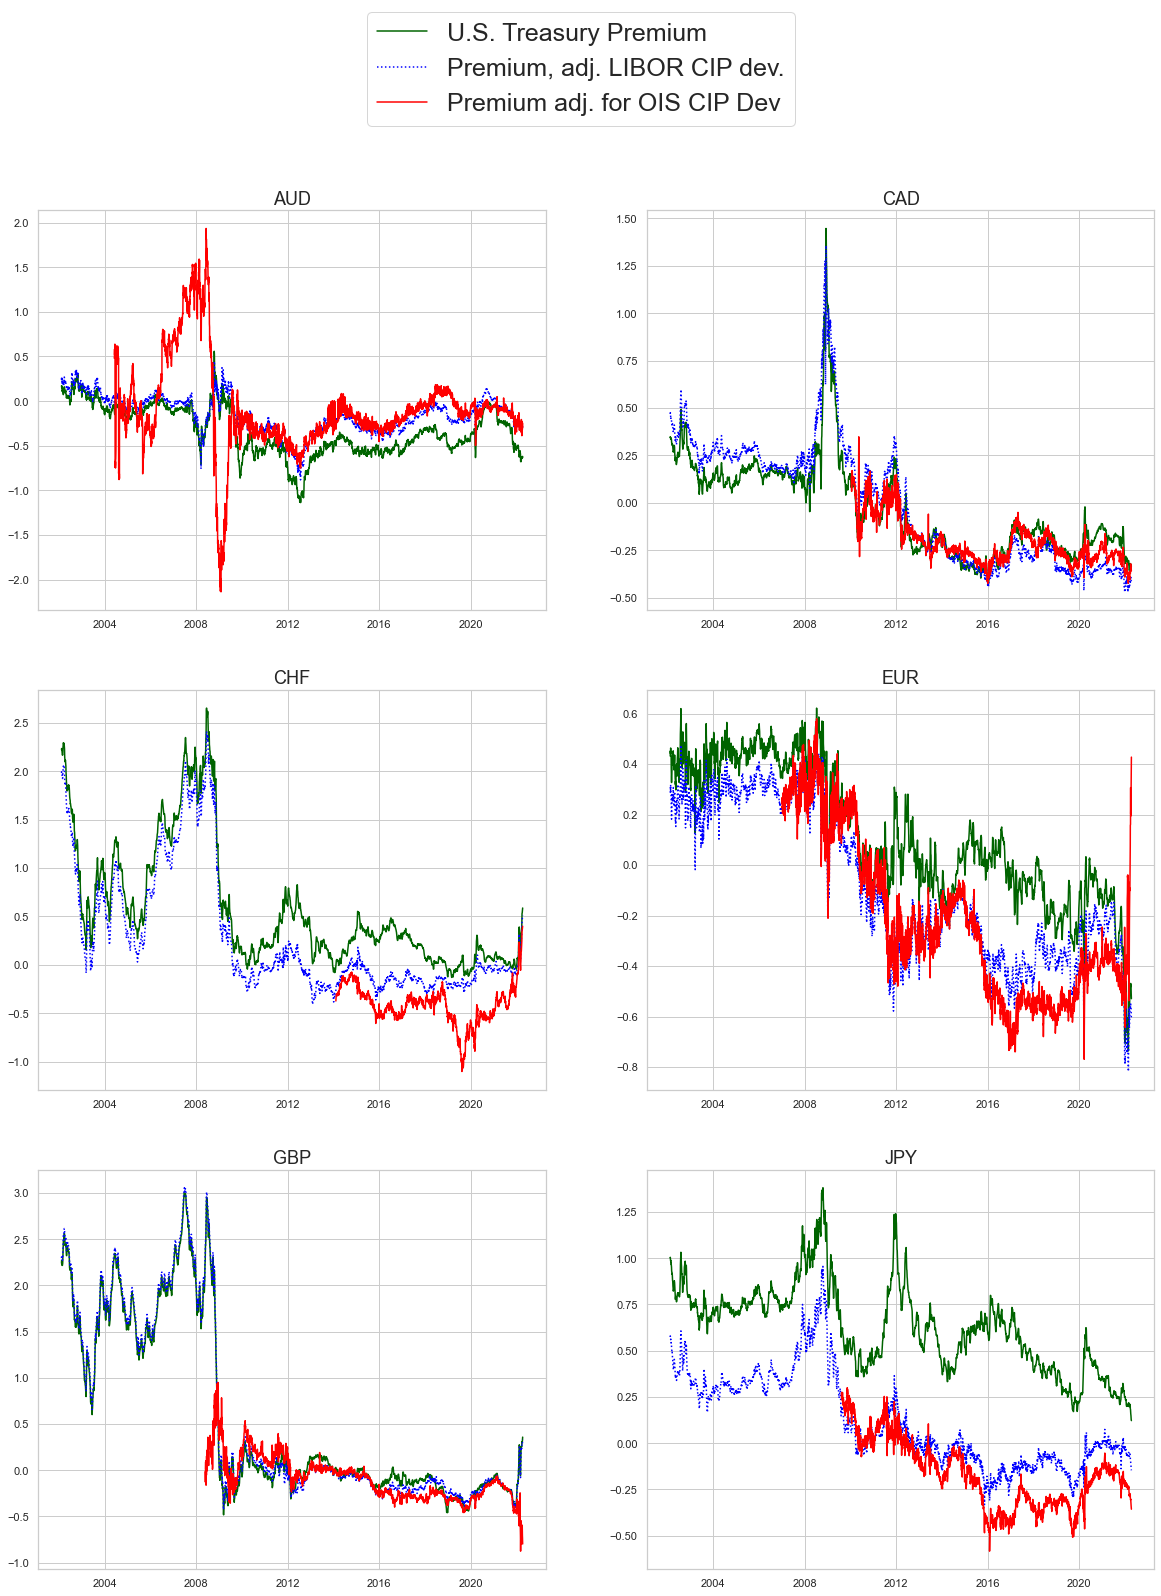

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,25))

axes[0][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['AUD'], color='darkgreen')
axes[0][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_AUD'], linestyle=':', color='blue')
axes[0][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_AUD'], linestyle='-', color='red')
axes[0][0].set_title('AUD', fontsize=18)

axes[0][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['CAD'], color='darkgreen')
axes[0][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_CAD'], linestyle=':', color='blue')
axes[0][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_CAD'], linestyle='-', color='red')
axes[0][1].set_title('CAD', fontsize=18)

axes[1][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['CHF'], color='darkgreen')
axes[1][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_CHF'], linestyle=':', color='blue')
axes[1][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_CHF'], linestyle='-', color='red')
axes[1][0].set_title('CHF', fontsize=18)

axes[1][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['EUR'], color='darkgreen')
axes[1][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_EUR'], linestyle=':', color='blue')
axes[1][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_EUR'], linestyle='-', color='red')
axes[1][1].set_title('EUR', fontsize=18)

axes[2][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['GBP'], color='darkgreen')
axes[2][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_GBP'], linestyle=':', color='blue')
axes[2][0].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_GBP'], linestyle='-', color='red')
axes[2][0].set_title('GBP', fontsize=18)

axes[2][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['JPY'], color='darkgreen')
axes[2][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_JPY'], linestyle=':', color='blue')
axes[2][1].plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_JPY'], linestyle='-', color='red')
axes[2][1].set_title('JPY', fontsize=18)

fig.legend(['U.S. Treasury Premium', 'Premium, adj. LIBOR CIP dev.', 'Premium adj. for OIS CIP Dev'], loc='upper center', fontsize=25)

In [62]:
# Computing Average Premia

df_TrsyPrm_TauOIS['Avg_Premium'] = df_TrsyPrm_TauOIS.iloc[:,1:7].mean(axis=1)
df_TrsyPrm_TauOIS['Avg_Adj_Tau'] = df_TrsyPrm_TauOIS.iloc[:,7:13].mean(axis=1)
df_TrsyPrm_TauOIS['Avg_Adj_Tau_OIS'] = df_TrsyPrm_TauOIS.iloc[:,13:19].mean(axis=1)

df_TrsyPrm_TauOIS['Avg_Adj_Tau_OIS'][df_TrsyPrm_TauOIS.Date<='01-13-2010'] = math.nan
df_TrsyPrm_TauOIS

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_21216/1255654682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TrsyPrm_TauOIS['Avg_Adj_Tau_OIS'][df_TrsyPrm_TauOIS.Date<='01-13-2010'] = math.nan


,Date,AUD,CAD,CHF,EUR,GBP,JPY,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,...,Adj_Tau_JPY,Adj_Tau_OIS_AUD,Adj_Tau_OIS_CAD,Adj_Tau_OIS_CHF,Adj_Tau_OIS_EUR,Adj_Tau_OIS_GBP,Adj_Tau_OIS_JPY,Avg_Premium,Avg_Adj_Tau,Avg_Adj_Tau_OIS
0,2002-02-13,0.171971,0.347857,2.220945,0.431552,2.240361,1.002400,0.236971,0.475357,1.980500,...,0.577400,NaN,NaN,NaN,NaN,NaN,NaN,1.069181,0.975374,NaN
1,2002-02-14,0.163571,0.344643,2.232374,0.443381,2.263218,1.004900,0.271071,0.472143,1.991929,...,0.579900,NaN,NaN,NaN,NaN,NaN,NaN,1.075348,0.988624,NaN
2,2002-02-15,0.155714,0.347500,2.233802,0.452066,2.270361,0.999000,0.250714,0.475000,1.993357,...,0.574000,NaN,NaN,NaN,NaN,NaN,NaN,1.076407,0.987600,NaN
3,2002-02-18,0.145929,0.343786,2.225088,0.440895,2.261647,0.988214,0.255929,0.471286,1.984643,...,0.563214,NaN,NaN,NaN,NaN,NaN,NaN,1.067593,0.981286,NaN
4,2002-02-19,0.143786,0.336643,2.216516,0.456424,2.258790,0.985543,0.208786,0.464143,1.976071,...,0.560543,NaN,NaN,NaN,NaN,NaN,NaN,1.066284,0.972476,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,2022-04-05,-0.620079,-0.328557,0.550129,-0.476521,0.302661,0.140493,-0.287579,-0.396057,0.477629,...,-0.128257,-0.234379,-0.348257,0.371329,0.299429,-0.685014,-0.328957,-0.071979,-0.102187,-0.154308
5251,2022-04-06,-0.624593,-0.333457,0.557629,-0.489036,0.311918,0.133093,-0.285843,-0.401357,0.485129,...,-0.135657,-0.316843,-0.348257,0.375629,0.283714,-0.698457,-0.338657,-0.074074,-0.103308,-0.173812
5252,2022-04-07,-0.633121,-0.335343,0.563757,-0.495050,0.323275,0.131336,-0.294371,-0.407843,0.491257,...,-0.137414,-0.245971,-0.344843,0.382157,0.311100,-0.713900,-0.340114,-0.074191,-0.104191,-0.158595
5253,2022-04-08,-0.635200,-0.335510,0.567100,-0.507607,0.337589,0.127379,-0.296450,-0.409840,0.494600,...,-0.141371,-0.286850,-0.354140,0.384800,0.378843,-0.726586,-0.344771,-0.074375,-0.104680,-0.158117


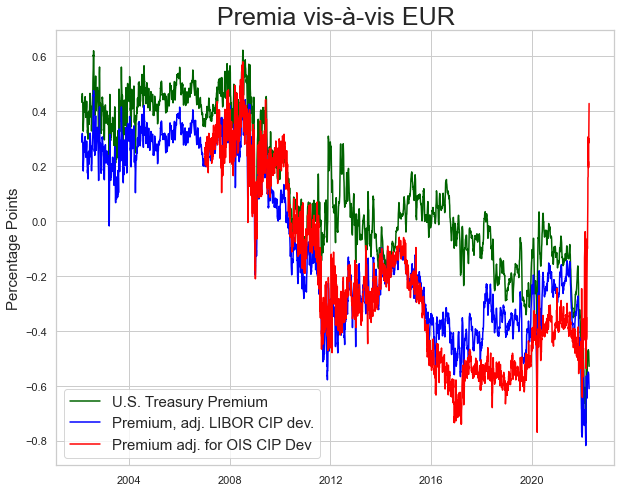

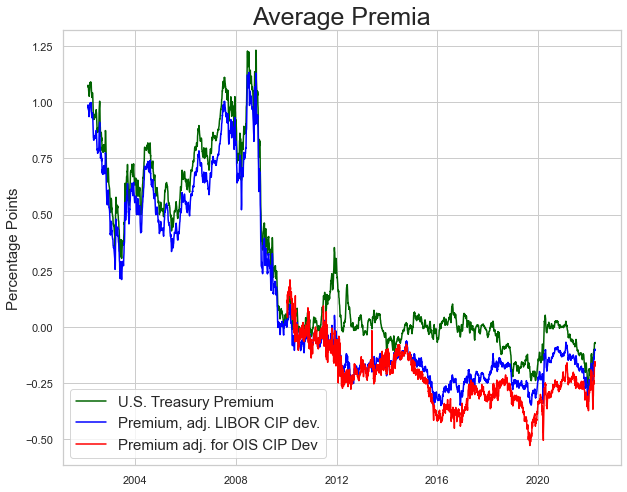

In [63]:
# Figure 6A

plt.figure(figsize=(10,8))
plt.plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['EUR'], color='darkgreen')
plt.plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_EUR'], color='blue')
plt.plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Adj_Tau_OIS_EUR'], color='red')
plt.title('Premia vis-à-vis EUR', fontsize=25)
plt.legend(['U.S. Treasury Premium', 'Premium, adj. LIBOR CIP dev.', 'Premium adj. for OIS CIP Dev'], loc='lower left', fontsize=15)
plt.ylabel('Percentage Points', fontsize=15)
plt.savefig("Output/Fig_6_Premia vis-à-vis EUR.jpg")
plt.show()

# Figure 6A

plt.figure(figsize=(10,8))
plt.plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Avg_Premium'], color='darkgreen')
plt.plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Avg_Adj_Tau'], color='blue')
plt.plot(df_TrsyPrm_TauOIS['Date'],df_TrsyPrm_TauOIS['Avg_Adj_Tau_OIS'], color='red')
plt.title('Average Premia', fontsize=25)
plt.legend(['U.S. Treasury Premium', 'Premium, adj. LIBOR CIP dev.', 'Premium adj. for OIS CIP Dev'], loc='lower left', fontsize=15)
plt.ylabel('Percentage Points', fontsize=15)
plt.savefig("Output/Fig_7_Average-Premia.jpg")
plt.show()